# **CRM: Focus on Segmentation**

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from jupyterthemes import jtplot


In [2]:
# Config the matplotlib backend as plotting inline in IPython

%matplotlib inline
jtplot.reset()
sns.set()

C:\Users\juann\Anaconda3\lib\site-packages\matplotlib\__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
C:\Users\juann\Anaconda3\lib\site-packages\matplotlib\__init__.py:855: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
C:\Users\juann\Anaconda3\lib\site-packages\matplotlib\__init__.py:846: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  "2.2", name=key, obj_type="rcparam", addendum=addendum)


In [3]:
def load_hdf(filename):
    """
    Load the first key of an HDF file
    """
    hdf = pd.HDFStore(filename,mode = 'r')
    keys = hdf.keys()
    if not keys:
        hdf.close()
        return pd.DataFrame()
    data_df = hdf.get(keys[0])
    hdf.close()
    return data_df

In [4]:
# To display the variables one after the other without need of print()
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## **1. Files Exploration**

In [5]:
PATH = 'data/'

crm_df = load_hdf(os.path.join(PATH, 'crm.hd5'))
#stock_dep_df = load_hdf(os.path.join(PATH, 'stock_dep.hd5'))
#stock_mag_df = load_hdf(os.path.join(PATH, 'stock_mag.hd5'))
#product_df = load_hdf(os.path.join(PATH, 'products.hd5'))
#stores_df = load_hdf(os.path.join(PATH, 'stores.hd5'))
transactions_df = load_hdf(os.path.join(PATH, 'transactions.hd5'))

## a/ CRM Exploration

In [6]:
crm_df.head()

# get a preview of the dataset
crm_df.sample(n=5)

,client_id_1,client_id_2,store_code,segmentation,age,postal_code
0,2071637,76:0000015577,B111,Ancienne Petite,57.0,54000
1,2227881,159-0000002105,B034,Fidèle Mono,0.0,83600
2,2183544,IMP-59940476,B677,Fidèle Occasionnelle -,54.0,61100
3,2642660,66:0000011921,B099,Ancienne Petite,68.0,69370
4,1849709,437:0000002778,B758,Abandonniste Occasionnelle,64.0,14200


,client_id_1,client_id_2,store_code,segmentation,age,postal_code
877629,7552737,264:0000042078,B143,Abandonniste Petite,54.0,0
325279,2303827,27-0000013356,B036,Fidèle Occasionnelle -,42.0,91000
961112,2011680,682:0000002428,B695,Fidèle Mono,43.0,38440
485559,1609077,133:0000008876,B561,Ancienne Petite,66.0,60500
638529,8361027,687:0000004110,B697,Fidèle Mono,62.0,40700


In [7]:
crm_df.info()
crm_df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1149866 entries, 0 to 1149865
Data columns (total 6 columns):
client_id_1     1149866 non-null int64
client_id_2     1149866 non-null object
store_code      1149866 non-null object
segmentation    1149866 non-null object
age             1149866 non-null float64
postal_code     1149866 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 61.4+ MB


client_id_1     0
client_id_2     0
store_code      0
segmentation    0
age             0
postal_code     0
dtype: int64

### Age Variable

count    1149866.0
mean          48.4
std           23.7
min            0.0
25%           40.0
50%           54.0
75%           65.0
max           93.0
Name: age, dtype: float64

<Figure size 640x480 with 0 Axes>

Text(0, 0.5, 'Number of appearances')

Text(0.5, 0, 'Age')

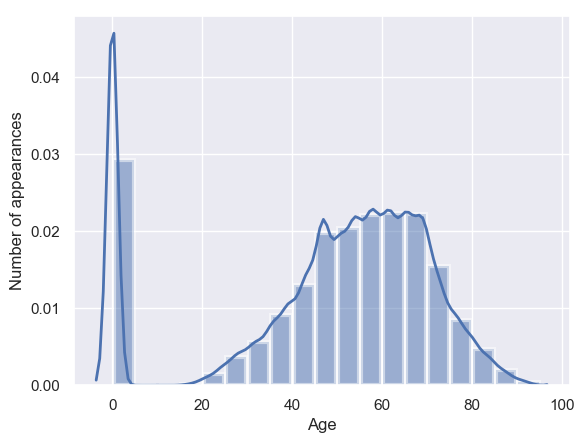

In [8]:
crm_df.age.describe().round(1)

plt.figure()
sns.distplot(crm_df.age,kde_kws={"lw": 2},bins = np.arange(0,100,5),
             hist_kws={"linewidth": 3, "rwidth": 0.9, "alpha": 0.5})
plt.ylabel("Number of appearances")
plt.xlabel("Age")
plt.show()

### Checking for the values equal to zero

In [11]:
crm_df.postal_code = crm_df.postal_code.astype('int64')
(crm_df ==0).sum(axis=0)

client_id_1          0
client_id_2          0
store_code           0
segmentation         0
age             168138
postal_code      77928
dtype: int64

We have many NaN for variables "age" and "postal_code"

### Segmentation variable

In [12]:
crm_df.segmentation.unique()
segments = crm_df.drop_duplicates('segmentation')['segmentation']

print('\n')
print(segments, '\n')
print("Number of different segments : {}".format(segments.count()))

array(['Ancienne Petite', 'Fidèle Mono', 'Fidèle Occasionnelle -',
       'Abandonniste Occasionnelle', 'Fidèle Gold', 'Fidèle Petite',
       'Fidèle Occasionnelle +', 'Abandonniste Petite',
       'Ancienne A réactiver', 'Fidèle Super Gold', 'Abandonniste Gold',
       'Nouvelle Mono', 'Nouvelle Multi'], dtype=object)



0                  Ancienne Petite
1                      Fidèle Mono
2           Fidèle Occasionnelle -
4       Abandonniste Occasionnelle
11                     Fidèle Gold
15                   Fidèle Petite
21          Fidèle Occasionnelle +
23             Abandonniste Petite
24            Ancienne A réactiver
61               Fidèle Super Gold
113              Abandonniste Gold
3068                 Nouvelle Mono
3307                Nouvelle Multi
Name: segmentation, dtype: object 

Number of different segments : 13


Plotting the age distribution per segment

Text(0.5, 0, 'Ancienne Petite')

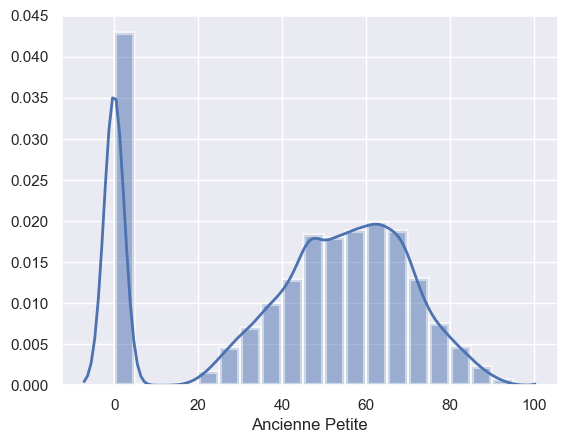

Text(0.5, 0, 'Fidèle Mono')

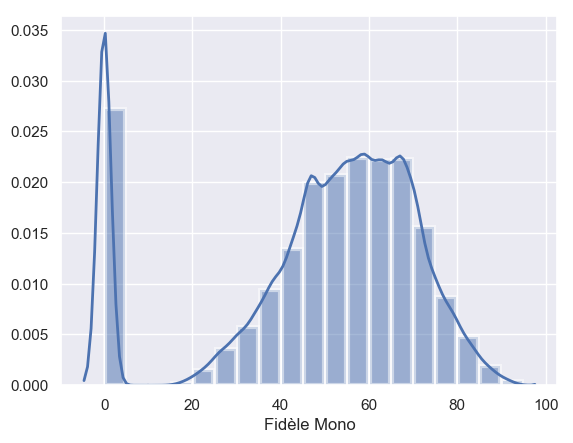

Text(0.5, 0, 'Fidèle Occasionnelle -')

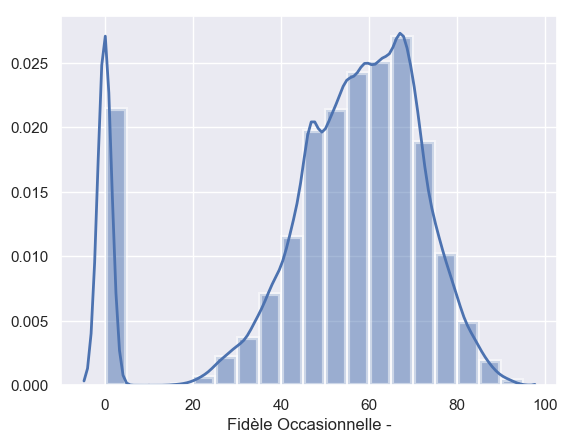

Text(0.5, 0, 'Abandonniste Occasionnelle')

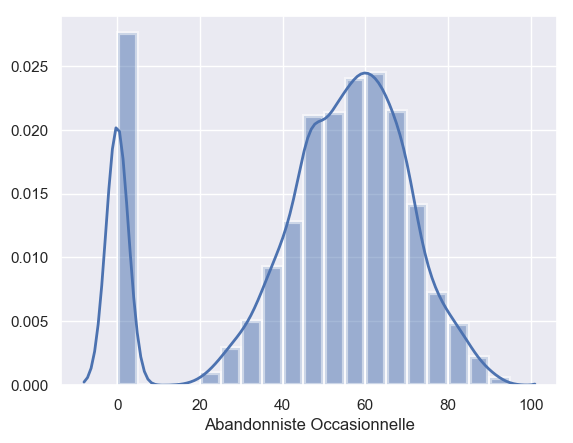

Text(0.5, 0, 'Fidèle Gold')

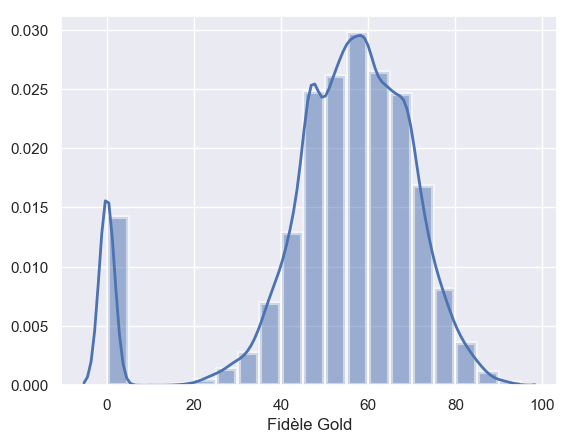

Text(0.5, 0, 'Fidèle Petite')

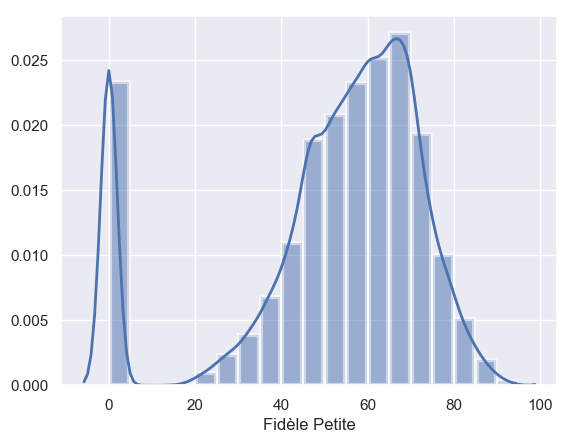

Text(0.5, 0, 'Fidèle Occasionnelle +')

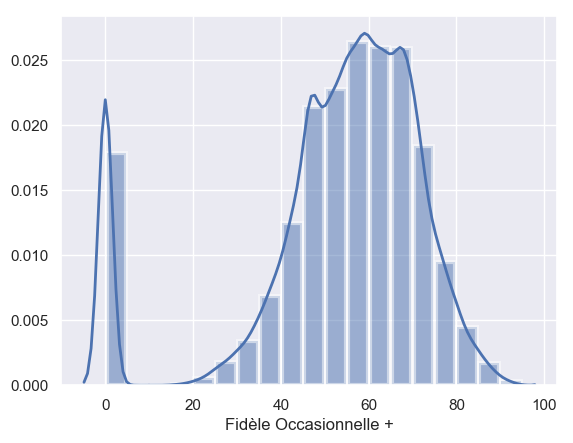

Text(0.5, 0, 'Abandonniste Petite')

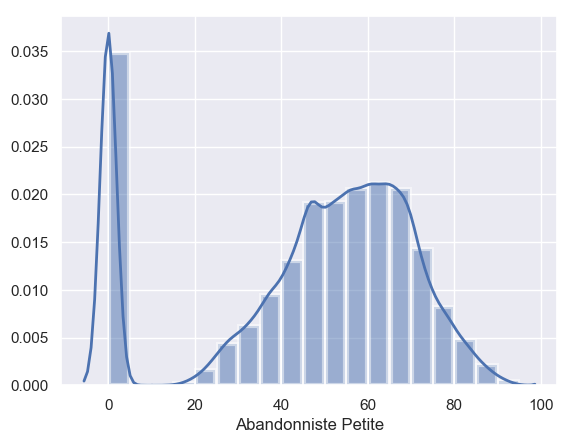

Text(0.5, 0, 'Ancienne A réactiver')

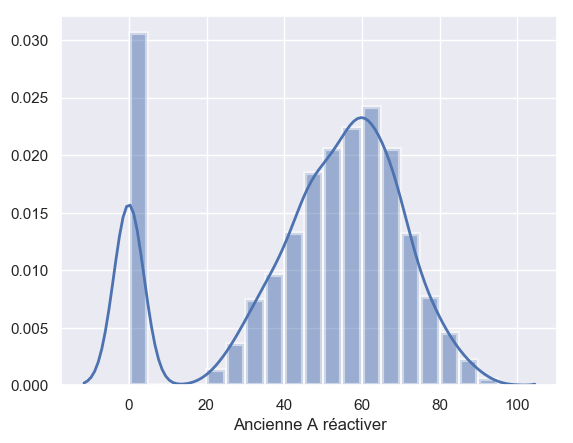

Text(0.5, 0, 'Fidèle Super Gold')

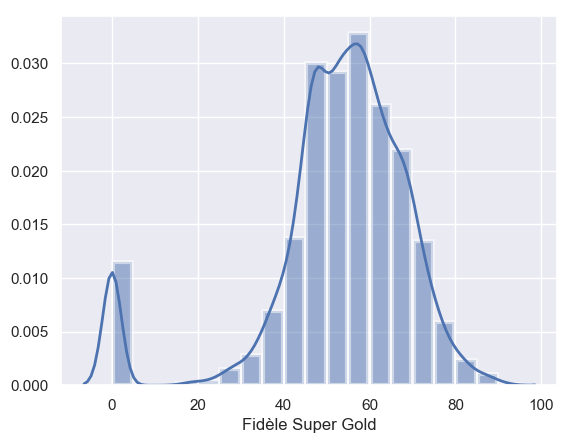

Text(0.5, 0, 'Abandonniste Gold')

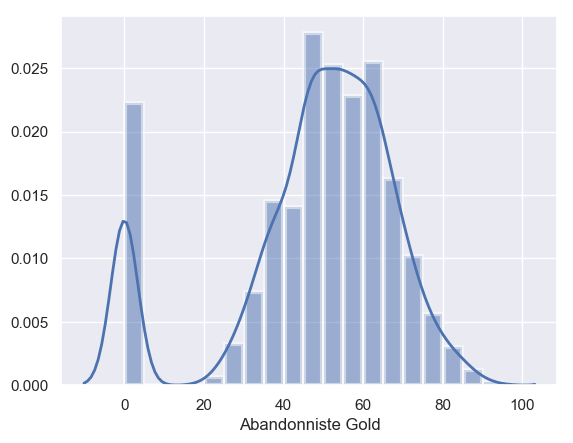

Text(0.5, 0, 'Nouvelle Mono')

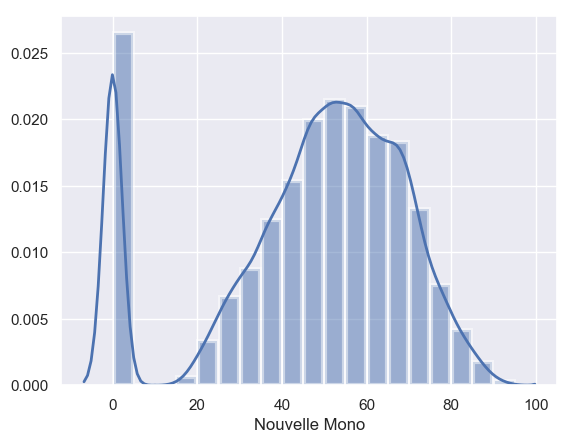

Text(0.5, 0, 'Nouvelle Multi')

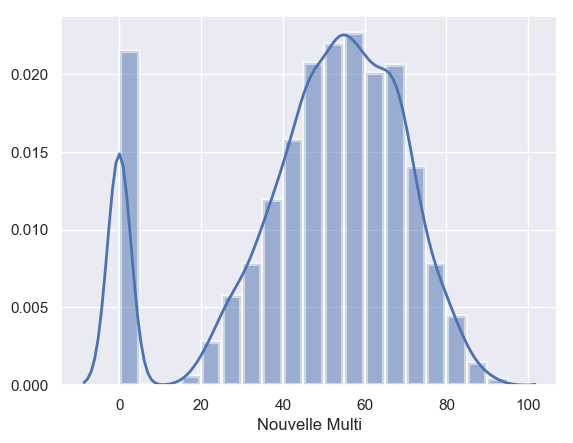

In [16]:
for i in segments:
    sns.distplot(crm_df.age[crm_df.segmentation == i],kde_kws={"lw": 2},bins = np.arange(0,100,5),
             hist_kws={"linewidth": 3, "rwidth": 0.9, "alpha": 0.5})
    plt.xlabel(i)
    plt.show()

Same without the values equal to zero

Text(0.5, 0, 'Ancienne Petite')

(1, 100)

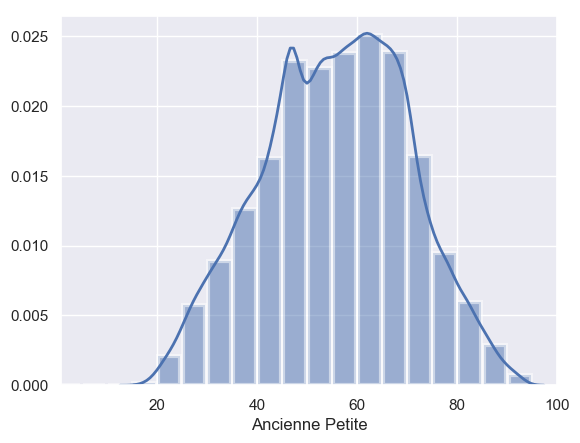

Text(0.5, 0, 'Fidèle Mono')

(1, 100)

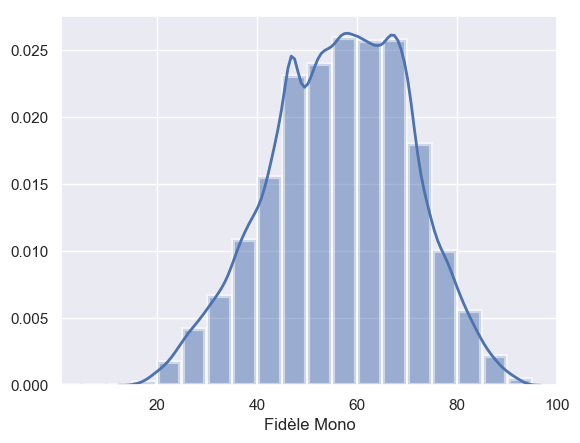

Text(0.5, 0, 'Fidèle Occasionnelle -')

(1, 100)

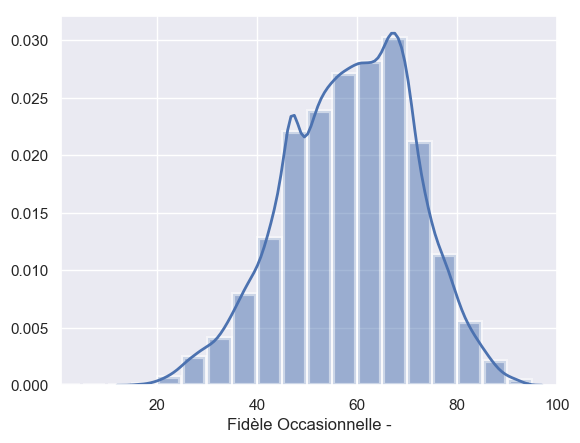

Text(0.5, 0, 'Abandonniste Occasionnelle')

(1, 100)

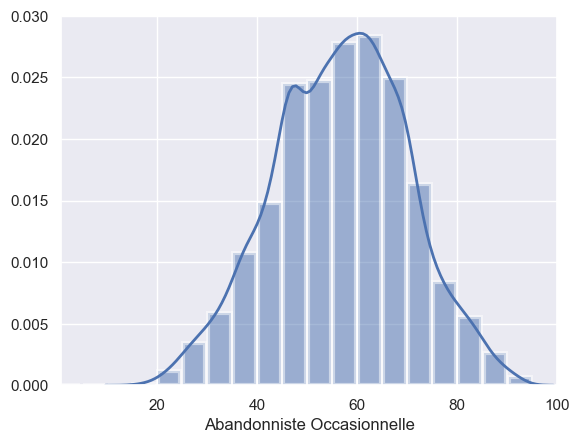

Text(0.5, 0, 'Fidèle Gold')

(1, 100)

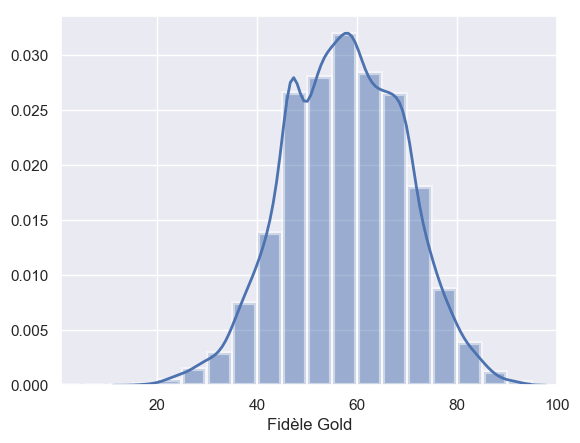

Text(0.5, 0, 'Fidèle Petite')

(1, 100)

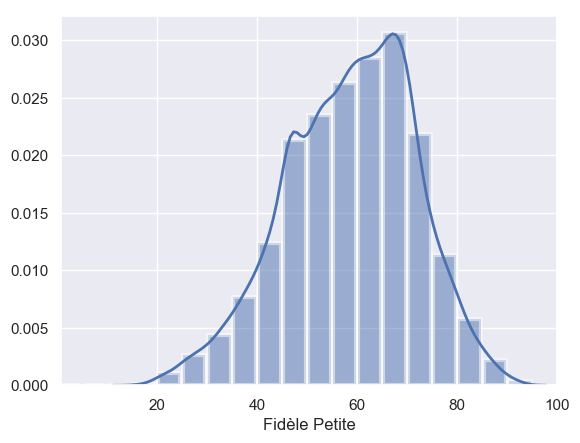

Text(0.5, 0, 'Fidèle Occasionnelle +')

(1, 100)

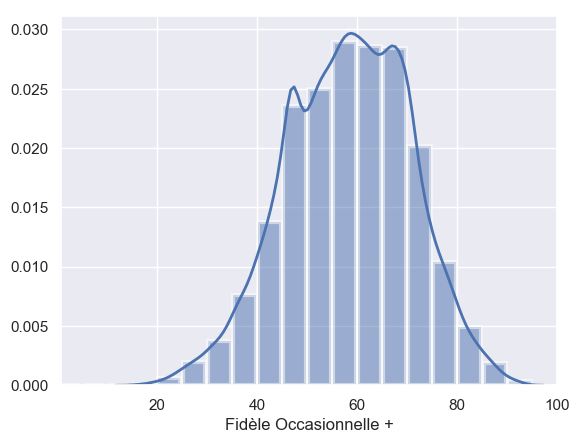

Text(0.5, 0, 'Abandonniste Petite')

(1, 100)

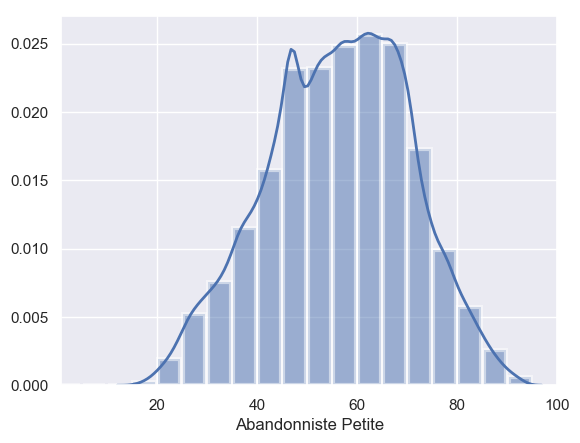

Text(0.5, 0, 'Ancienne A réactiver')

(1, 100)

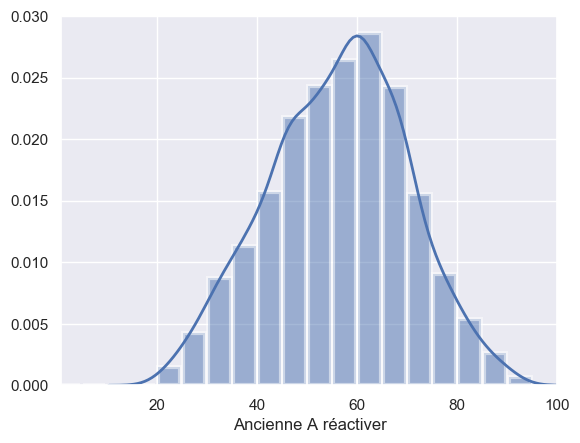

Text(0.5, 0, 'Fidèle Super Gold')

(1, 100)

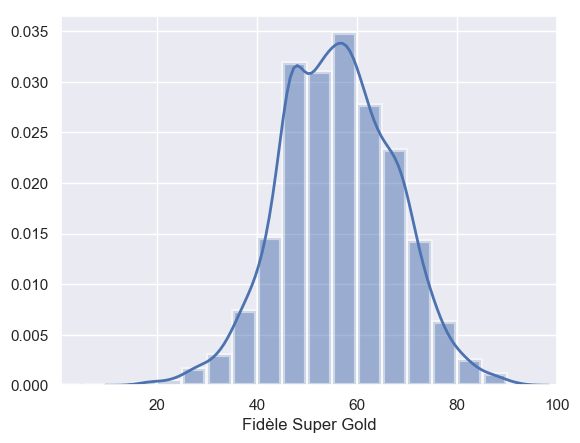

Text(0.5, 0, 'Abandonniste Gold')

(1, 100)

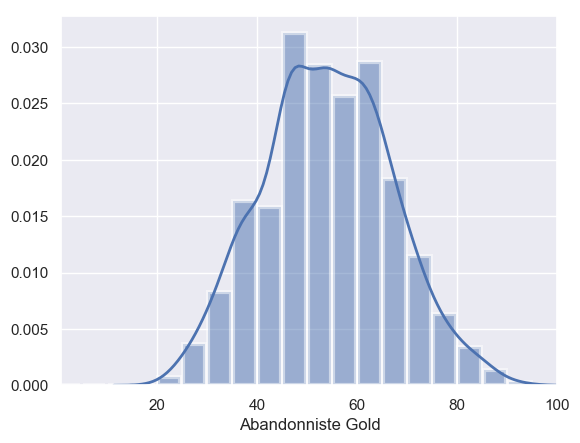

Text(0.5, 0, 'Nouvelle Mono')

(1, 100)

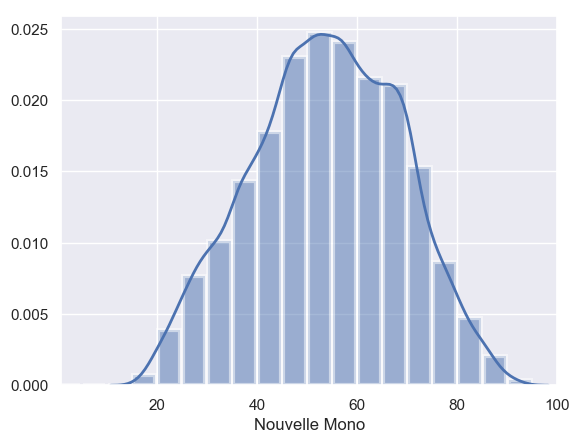

Text(0.5, 0, 'Nouvelle Multi')

(1, 100)

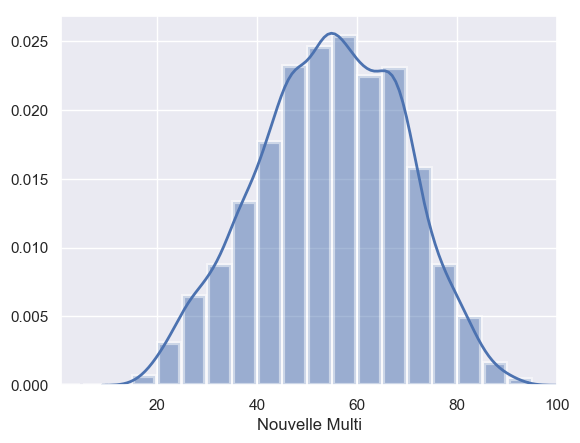

In [17]:
age_per_segment = plt.figure()

for i in segments:
    sns.distplot(crm_df.age[(crm_df.segmentation == i) & (crm_df.age != 0)],kde_kws={"lw": 2},bins = np.arange(0,100,5),
             hist_kws={"linewidth": 3, "rwidth": 0.9, "alpha": 0.5})
    plt.xlabel(i)
    plt.xlim((1,100))
    plt.show()

The age variable does not seem to have a real impact on the categorization of the clients.

### b/ Transactions exploration

In [13]:
transactions_df.head()

,day,commercial_year,store_code,ticket_id,client_id_2,ticket_line_number,promo_code,discount_code,returning_code,collection_code,...,unit_sold,price_theoric,price_net_no_taxes,price_net,cost,margin,cashier_discount,unit_price,unit_cost,discount
174,2015-06-18,201525.0,B750,22707/000112774,X,1.0,P3B5E,XXX,XXX,B5E,...,1.0,55.0,27.50,33.0,10.35,17.15,0.0,55.0,10.35,40
175,2015-06-18,201525.0,B750,22707/000112775,461:0000005900,1.0,PB,OPR,XXX,B5E,...,1.0,79.0,52.67,63.2,18.48,34.19,15.8,79.0,18.48,0
176,2015-06-18,201525.0,B750,22707/000112775,461:0000005900,2.0,PB,OPR,XXX,B5E,...,1.0,99.0,57.75,69.3,26.22,31.53,29.7,99.0,26.22,0
177,2015-06-18,201525.0,B750,22707/000112775,461:0000005900,3.0,PB,OPR,XXX,B5E,...,1.0,80.0,33.33,40.0,20.55,12.78,40.0,80.0,20.55,0
178,2015-06-18,201525.0,B750,22707/000112775,461:0000005900,4.0,PB,OPR,XXX,B5E,...,1.0,69.0,40.25,48.3,17.02,23.23,20.7,69.0,17.02,0


In [14]:
transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8337191 entries, 174 to 82475
Data columns (total 23 columns):
day                   datetime64[ns]
commercial_year       float64
store_code            object
ticket_id             object
client_id_2           object
ticket_line_number    float64
promo_code            object
discount_code         object
returning_code        object
collection_code       object
pdt_code              object
size                  object
sku                   object
unit_sold             float64
price_theoric         float64
price_net_no_taxes    float64
price_net             float64
cost                  float64
margin                float64
cashier_discount      float64
unit_price            float64
unit_cost             float64
discount              int64
dtypes: datetime64[ns](1), float64(11), int64(1), object(10)
memory usage: 1.5+ GB


In [15]:
transactions_df.iloc[0]

day                   2015-06-18 00:00:00
commercial_year                    201525
store_code                           B750
ticket_id                 22707/000112774
client_id_2                             X
ticket_line_number                      1
promo_code                          P3B5E
discount_code                         XXX
returning_code                        XXX
collection_code                       B5E
pdt_code                         T402265F
size                                   42
sku                         EB5T402265F05
unit_sold                               1
price_theoric                          55
price_net_no_taxes                   27.5
price_net                              33
cost                                10.35
margin                              17.15
cashier_discount                        0
unit_price                             55
unit_cost                           10.35
discount                               40
Name: 174, dtype: object

### c/ Adding he interesting CRM features to the transactions
We decided to include the segmentation and age variables to the Transactions' DataFrame

In [18]:
# Creating a df with the crm cols we are interested in
crm_age_seg = crm_df.filter(['client_id_2','segmentation','age'], axis=1) # equiv to = crm_df[['age','segmentation']].copy

In [19]:
# Merging the df according to the client_id_2 col
transac_crm = pd.merge(transactions_df, crm_age_seg, how = 'left', left_on='client_id_2', right_on='client_id_2')

### Dropping NAs
We decided to drop the rows that contain NaN for "age" and "segmentation", since those correspond to clients who are not in our database.

In [20]:
transac_crm_nona = transac_crm.dropna( axis = 0, subset = ["age", "segmentation"]).copy()

In [21]:
transac_crm_nona[['segmentation', 'age']].isna().sum()

segmentation    0
age             0
dtype: int64

In [22]:
transac_crm_nona[ transac_crm_nona['segmentation'] == "Fidèle Super Gold" ]['margin'].mean()

29.570782558653935

<Figure size 640x480 with 0 Axes>

Text(0, 0.5, 'Number of appearances')

Text(0.5, 0, 'Margin for Fidèle Occasionnelle -')

(-30, 200)

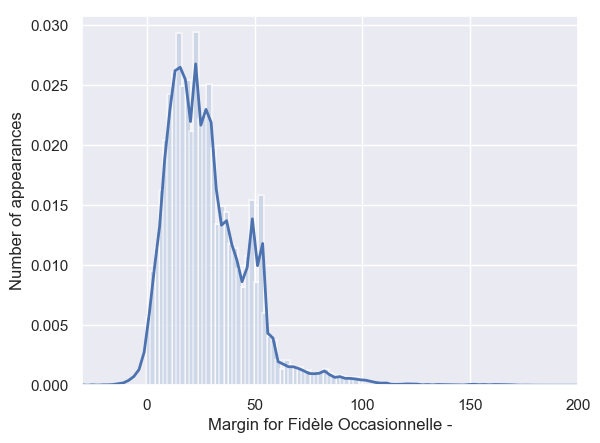

<Figure size 640x480 with 0 Axes>

Text(0, 0.5, 'Number of appearances')

Text(0.5, 0, 'Margin for Fidèle Mono')

(-30, 200)

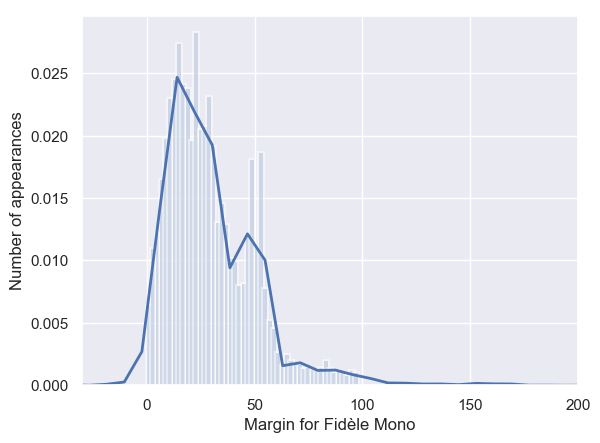

<Figure size 640x480 with 0 Axes>

Text(0, 0.5, 'Number of appearances')

Text(0.5, 0, 'Margin for Fidèle Gold')

(-30, 200)

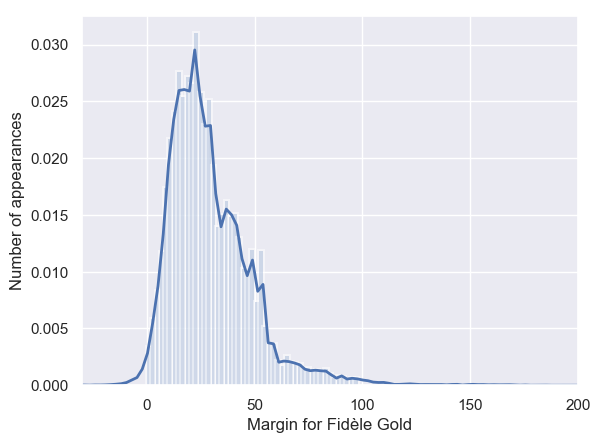

<Figure size 640x480 with 0 Axes>

Text(0, 0.5, 'Number of appearances')

Text(0.5, 0, 'Margin for Fidèle Occasionnelle +')

(-30, 200)

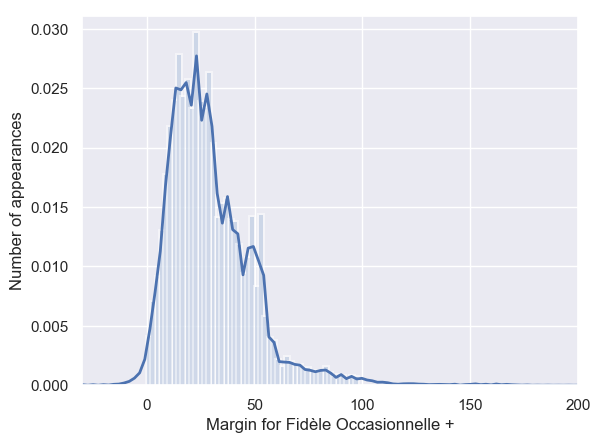

<Figure size 640x480 with 0 Axes>

Text(0, 0.5, 'Number of appearances')

Text(0.5, 0, 'Margin for Ancienne Petite')

(-30, 200)

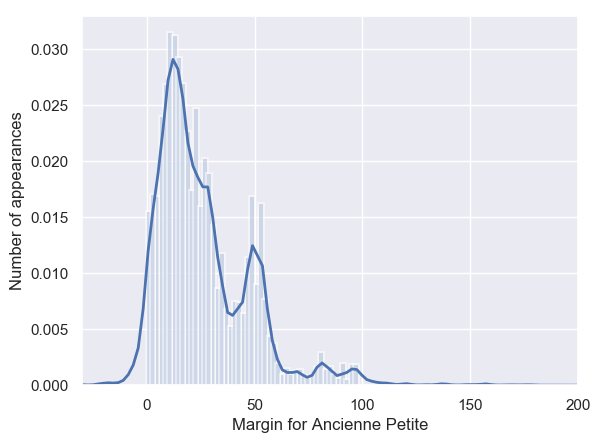

<Figure size 640x480 with 0 Axes>

Text(0, 0.5, 'Number of appearances')

Text(0.5, 0, 'Margin for Fidèle Petite')

(-30, 200)

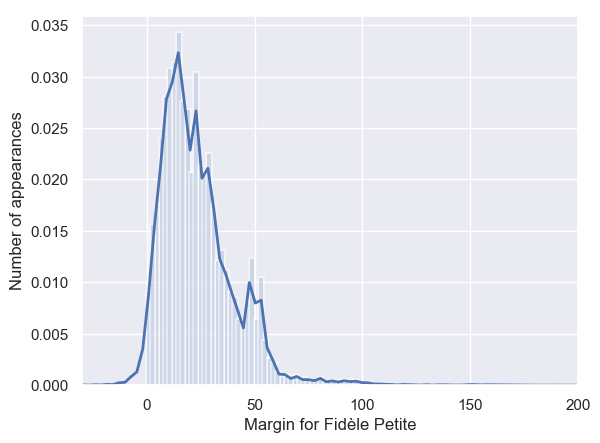

<Figure size 640x480 with 0 Axes>

Text(0, 0.5, 'Number of appearances')

Text(0.5, 0, 'Margin for Fidèle Super Gold')

(-30, 200)

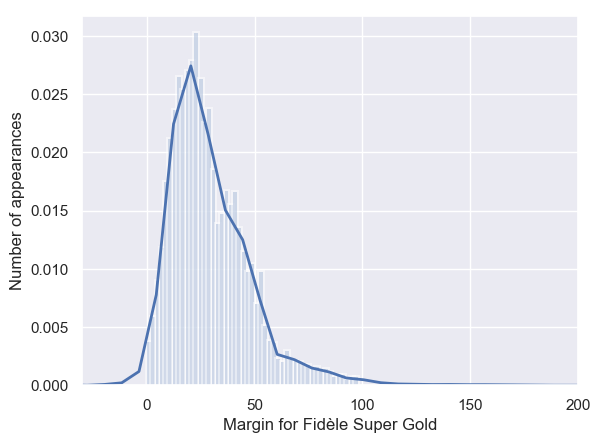

<Figure size 640x480 with 0 Axes>

Text(0, 0.5, 'Number of appearances')

Text(0.5, 0, 'Margin for Abandonniste Petite')

(-30, 200)

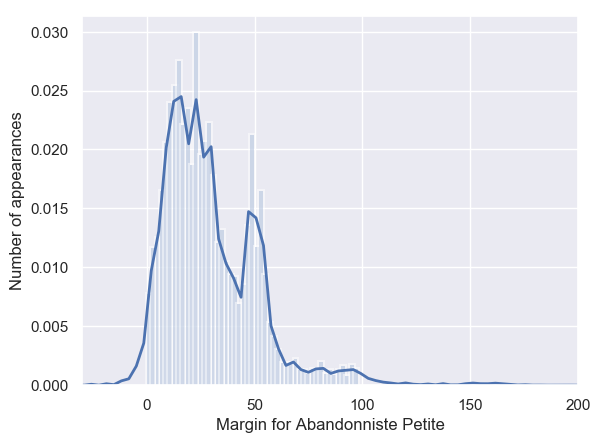

<Figure size 640x480 with 0 Axes>

Text(0, 0.5, 'Number of appearances')

Text(0.5, 0, 'Margin for Abandonniste Gold')

(-30, 200)

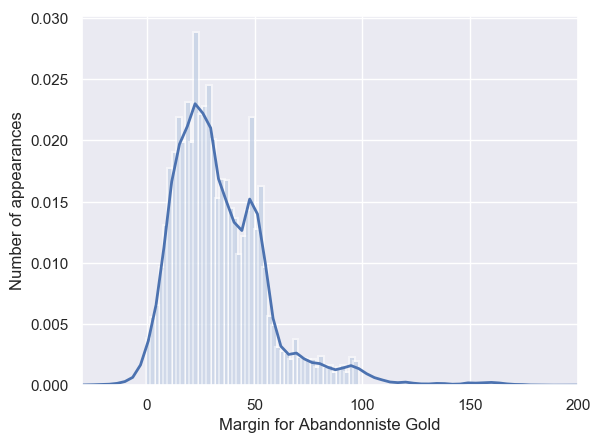

<Figure size 640x480 with 0 Axes>

Text(0, 0.5, 'Number of appearances')

Text(0.5, 0, 'Margin for Abandonniste Occasionnelle')

(-30, 200)

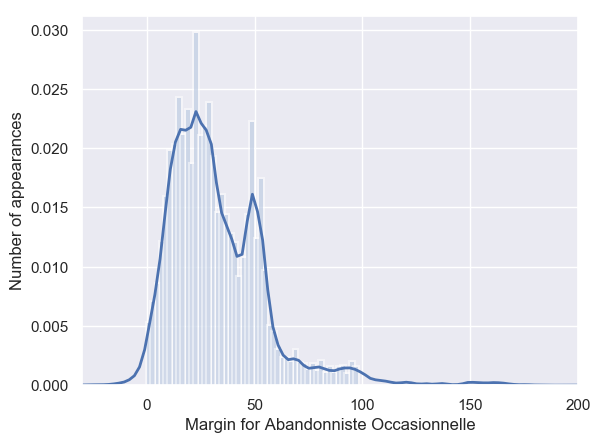

<Figure size 640x480 with 0 Axes>

Text(0, 0.5, 'Number of appearances')

Text(0.5, 0, 'Margin for Ancienne A réactiver')

(-30, 200)

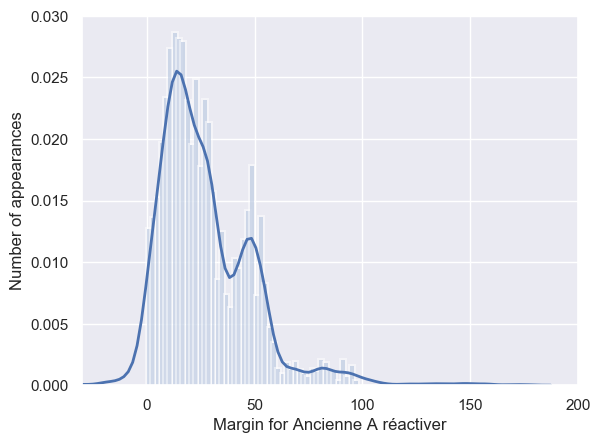

<Figure size 640x480 with 0 Axes>

Text(0, 0.5, 'Number of appearances')

Text(0.5, 0, 'Margin for Nouvelle Mono')

(-30, 200)

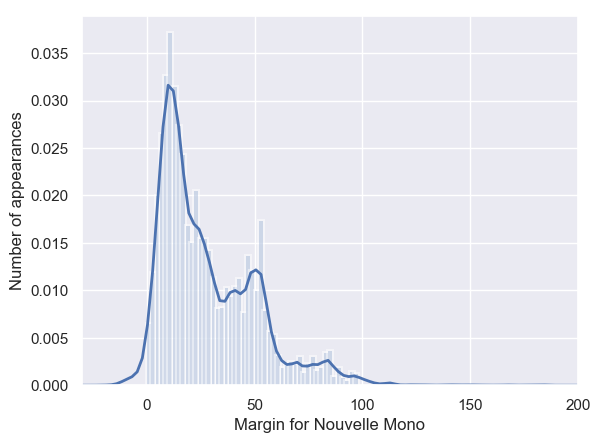

<Figure size 640x480 with 0 Axes>

Text(0, 0.5, 'Number of appearances')

Text(0.5, 0, 'Margin for Nouvelle Multi')

(-30, 200)

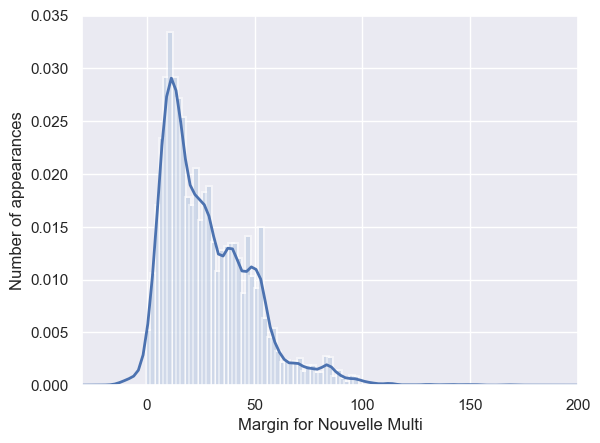

In [23]:
for i in transac_crm_nona['segmentation'].unique():
    plt.figure()
    sns.distplot(transac_crm_nona[ transac_crm_nona['segmentation'] == i ]['margin'],kde_kws={"lw": 2}, bins = np.arange(0,100,2),
                 hist_kws={"linewidth": 3, "rwidth": 0.9, "alpha": 0.5})
    plt.ylabel("Number of appearances")
    plt.xlabel("Margin for {}".format(i))
    plt.xlim((-30,200))
    plt.show()

### **d/ Creating a variable "promo" accountign for purchases made with Promotion**

In [24]:
transac_crm_nona["promo"] = ( ( transac_crm_nona.discount > 0 ) | (transac_crm_nona.cashier_discount > 0 ) ).astype('int64')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text xticklabel objects>)

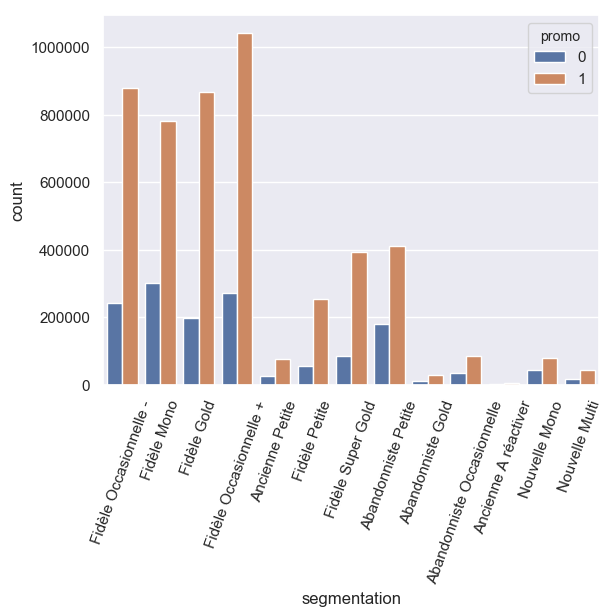

In [25]:
sns.countplot(data=transac_crm_nona, x='segmentation', hue='promo')
plt.xticks(rotation = 70)
plt.show()

In [26]:
save=pd.DataFrame(transac_crm_nona[transac_crm_nona.promo==1].groupby(['segmentation'])['unit_sold'].sum())
savetot=pd.DataFrame(transac_crm_nona.groupby(['segmentation'])['unit_sold'].sum())
save['unit_sold'] = save['unit_sold'] / savetot['unit_sold']

In [27]:
promo_to_total_sales_ratio = save.sort_values('unit_sold',ascending=False)

<Figure size 1500x700 with 0 Axes>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text xticklabel objects>)

Text(0.5, 1.0, 'Promotions to total sales ratio per segment')

Text(0, 0.5, '')

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]), <a list of 6 Text xticklabel objects>)

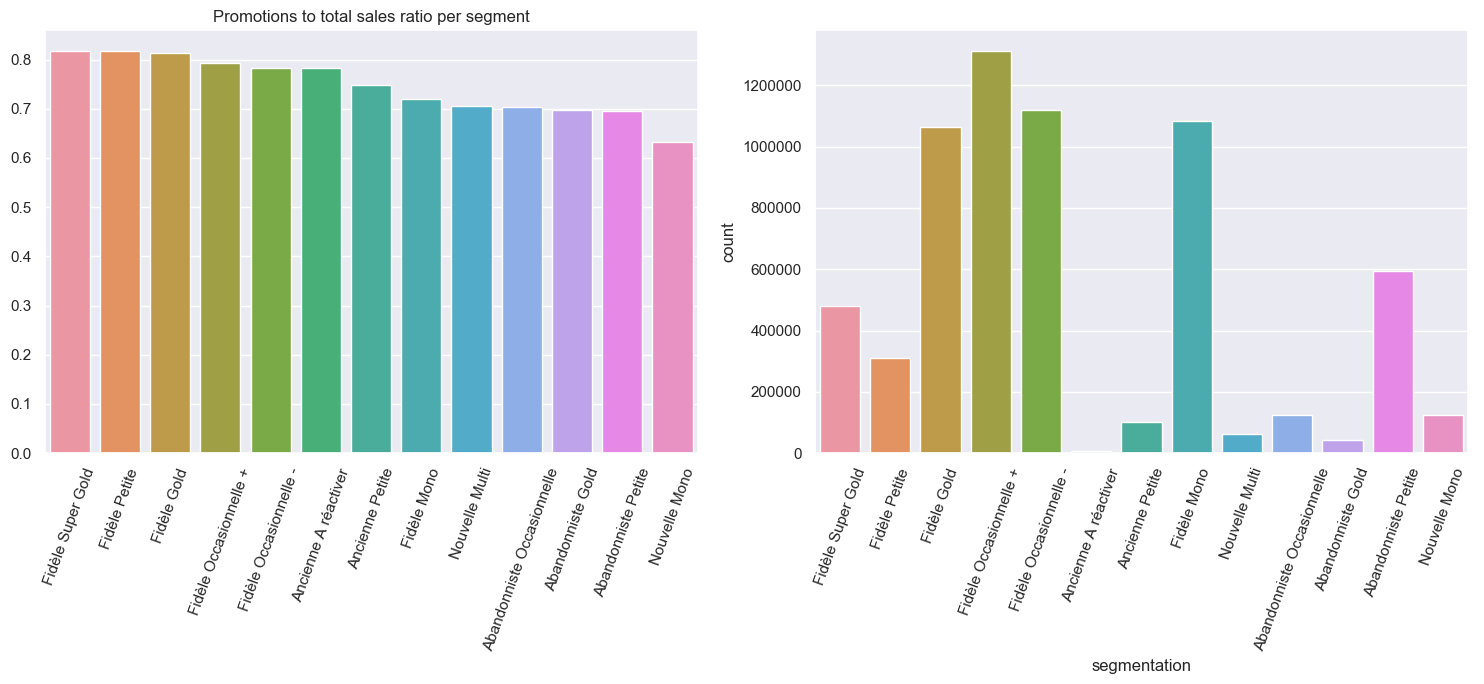

In [28]:
plt.figure(figsize=(15,7))

plt.subplot(1,2,1)
sns.barplot(y = promo_to_total_sales_ratio['unit_sold'], x = promo_to_total_sales_ratio.index.values)
plt.xticks(rotation = 70)
plt.title("Promotions to total sales ratio per segment")
plt.ylabel("")

plt.subplot(1,2,2)
plt.xticks(rotation = 70)
sns.countplot(data= transac_crm_nona, x='segmentation', order = promo_to_total_sales_ratio.index)

plt.tight_layout()
plt.show()

It is highly interesting to see that the most valuable cutomers, according to the previous segmentation, are also the customers most interested in promotions.

## 2. Creating a new and complete CRM DataFrame
We wish to build our new segmentation starting from the CRM Database. To do so, we have to add many variables to it.

In [29]:
crm_tot_df=crm_age_seg.copy()


***Inserting the total of unit solds per customer***

In [30]:
crm_tot_df = pd.merge(crm_tot_df, pd.DataFrame(transac_crm_nona.groupby('client_id_2')['unit_sold'].sum()), how = 'left', left_on='client_id_2', right_on='client_id_2')

In [31]:
crm_tot_df[crm_tot_df.unit_sold.isna()].segmentation.value_counts()

Ancienne Petite               122992
Abandonniste Petite            13566
Fidèle Mono                    13132
Nouvelle Mono                   5720
Fidèle Occasionnelle -          2608
Fidèle Petite                   2313
Ancienne A réactiver            1801
Fidèle Occasionnelle +          1022
Nouvelle Multi                   734
Abandonniste Occasionnelle       440
Fidèle Gold                      291
Abandonniste Gold                 79
Fidèle Super Gold                 52
Name: segmentation, dtype: int64

In [32]:
col_names = list(crm_tot_df.columns.values)
print(col_names)

['client_id_2', 'segmentation', 'age', 'unit_sold']


In [33]:
col_names[3] = 'tot_unit_sold'
crm_tot_df.columns = col_names

In [34]:
crm_tot_df.head()

,client_id_2,segmentation,age,tot_unit_sold
0,76:0000015577,Ancienne Petite,57.0,NaN
1,159-0000002105,Fidèle Mono,0.0,12.0
2,IMP-59940476,Fidèle Occasionnelle -,54.0,4.0
3,66:0000011921,Ancienne Petite,68.0,NaN
4,437:0000002778,Abandonniste Occasionnelle,64.0,7.0


***Inserting average unit sold per customer, per transaction***

In [35]:
crm_tot_df = pd.merge(crm_tot_df, pd.DataFrame(transac_crm_nona.groupby('client_id_2')['unit_sold'].mean()), how = 'left', left_on='client_id_2', right_on='client_id_2')

In [36]:
col_names = list(crm_tot_df.columns.values)
col_names[4] = 'mean_unit_sold'
crm_tot_df.columns = col_names

***Inserting total number of transactions per customer***

In [37]:
crm_tot_df = pd.merge(crm_tot_df, pd.DataFrame(transac_crm_nona.groupby('client_id_2')['unit_sold'].count()), how = 'left', left_on='client_id_2', right_on='client_id_2')

***Inserting total margin per customer***

In [38]:
crm_tot_df = pd.merge(crm_tot_df, pd.DataFrame(transac_crm_nona.groupby('client_id_2')['margin'].sum()), how = 'left', left_on='client_id_2', right_on='client_id_2')

***Inserting average net price per customer***

In [39]:
crm_tot_df = pd.merge(crm_tot_df, pd.DataFrame(transac_crm_nona.groupby('client_id_2')['price_net'].mean()), how = 'left', left_on='client_id_2', right_on='client_id_2')

***Inserting average theoric price per customer***

In [40]:
crm_tot_df = pd.merge(crm_tot_df, pd.DataFrame(transac_crm_nona.groupby('client_id_2')['price_theoric'].mean()), how = 'left', left_on='client_id_2', right_on='client_id_2')

***Inserting the ratio of transactions with promotions***

In [41]:
save2=pd.DataFrame(transac_crm_nona[transac_crm_nona.promo==1].groupby(['client_id_2'])['unit_sold'].sum())
savetot2=pd.DataFrame(transac_crm_nona.groupby(['client_id_2'])['unit_sold'].sum())
save2['unit_sold'] = save2['unit_sold'] / savetot2['unit_sold']

In [42]:
crm_tot_df = pd.merge(crm_tot_df, save2, how = 'left', left_on='client_id_2', right_on='client_id_2')

In [43]:
crm_tot_df.columns.values

array(['client_id_2', 'segmentation', 'age', 'tot_unit_sold',
       'mean_unit_sold', 'unit_sold_x', 'margin', 'price_net',
       'price_theoric', 'unit_sold_y'], dtype=object)

In [44]:
col_names = ['client_id_2', 'segmentation', 'age', 'tot_unit_sold',
       'mean_unit_sold', 'nb of transactions', 'margin', 'price_net',
       'price_theoric', 'Promo to total ratio']
crm_tot_df.columns = col_names

### Replacing NaNs

In [45]:
crm_tot_df[['tot_unit_sold',
       'mean_unit_sold', 'nb of transactions', 'margin', 'price_net',
       'price_theoric', 'Promo to total ratio']].isna().sum()

tot_unit_sold           164750
mean_unit_sold          164750
nb of transactions      164750
margin                  164750
price_net               164750
price_theoric           164750
Promo to total ratio    332839
dtype: int64

In [46]:
# Replace NaNs by 0
crm_tot_df_withna = crm_tot_df.copy()
crm_tot_df.fillna(0,inplace=True)

As we can see that the NaNs correspond to users that have not bought anything up to this date, we will replace their values by 0s.

Let us now try to evaluate the differences between the segments

<Figure size 1000x800 with 0 Axes>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text xticklabel objects>)

Text(0.5, 1.0, 'age')

Text(0, 0.5, '')

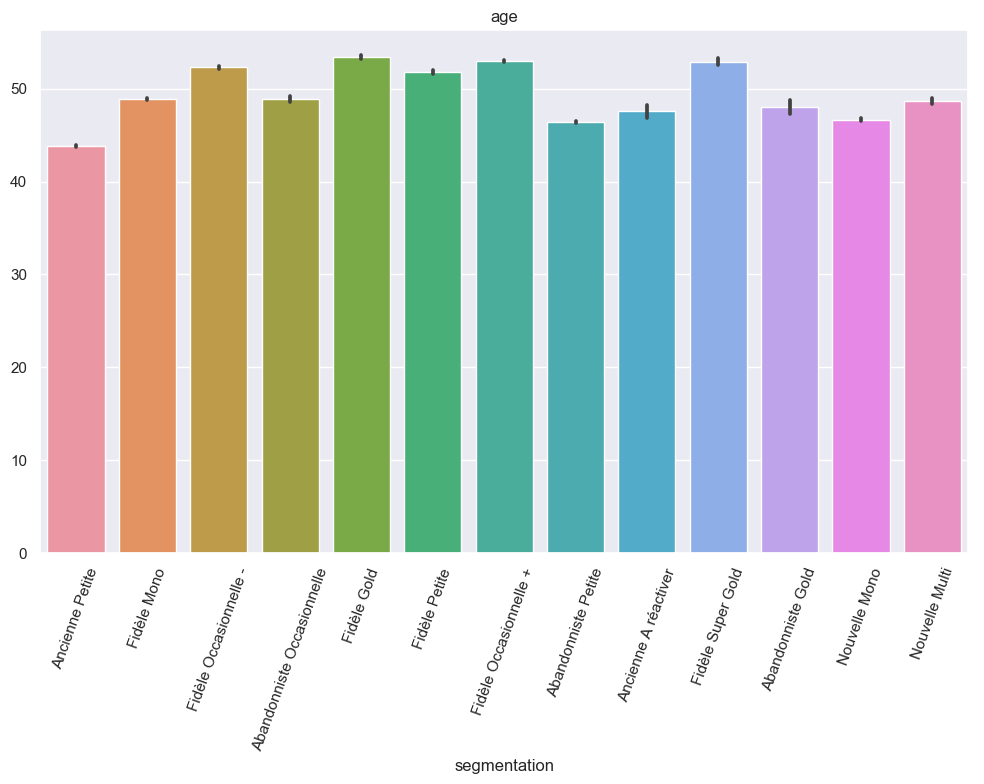

<Figure size 1000x800 with 0 Axes>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text xticklabel objects>)

Text(0.5, 1.0, 'tot_unit_sold')

Text(0, 0.5, '')

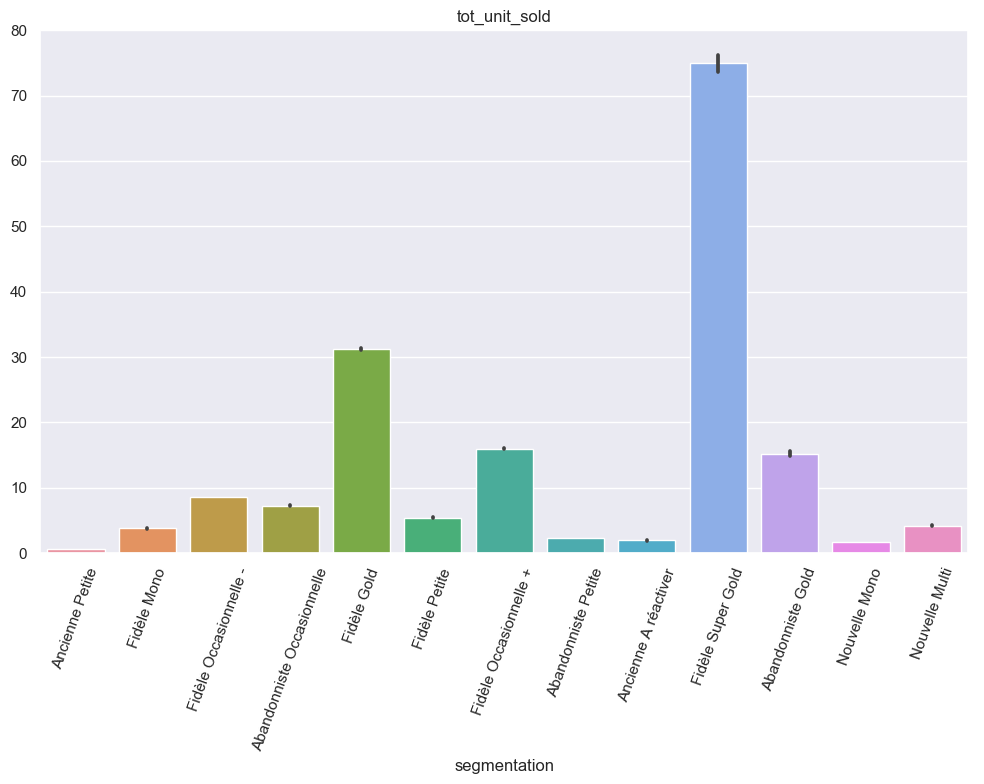

<Figure size 1000x800 with 0 Axes>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text xticklabel objects>)

Text(0.5, 1.0, 'mean_unit_sold')

Text(0, 0.5, '')

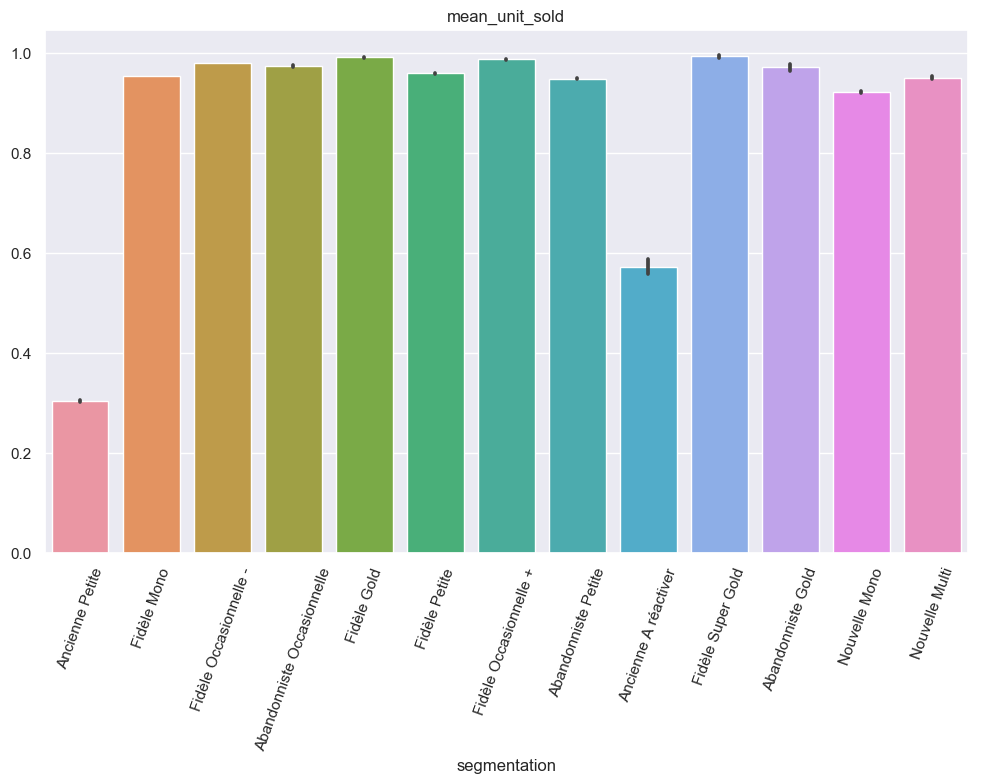

<Figure size 1000x800 with 0 Axes>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text xticklabel objects>)

Text(0.5, 1.0, 'nb of transactions')

Text(0, 0.5, '')

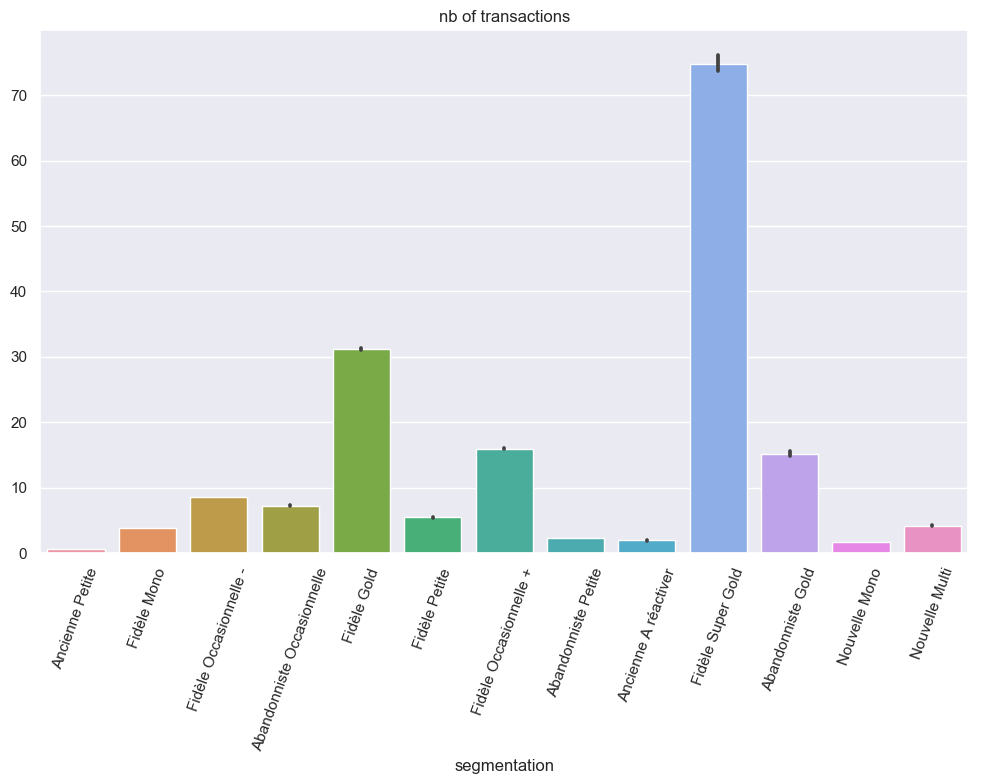

<Figure size 1000x800 with 0 Axes>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text xticklabel objects>)

Text(0.5, 1.0, 'margin')

Text(0, 0.5, '')

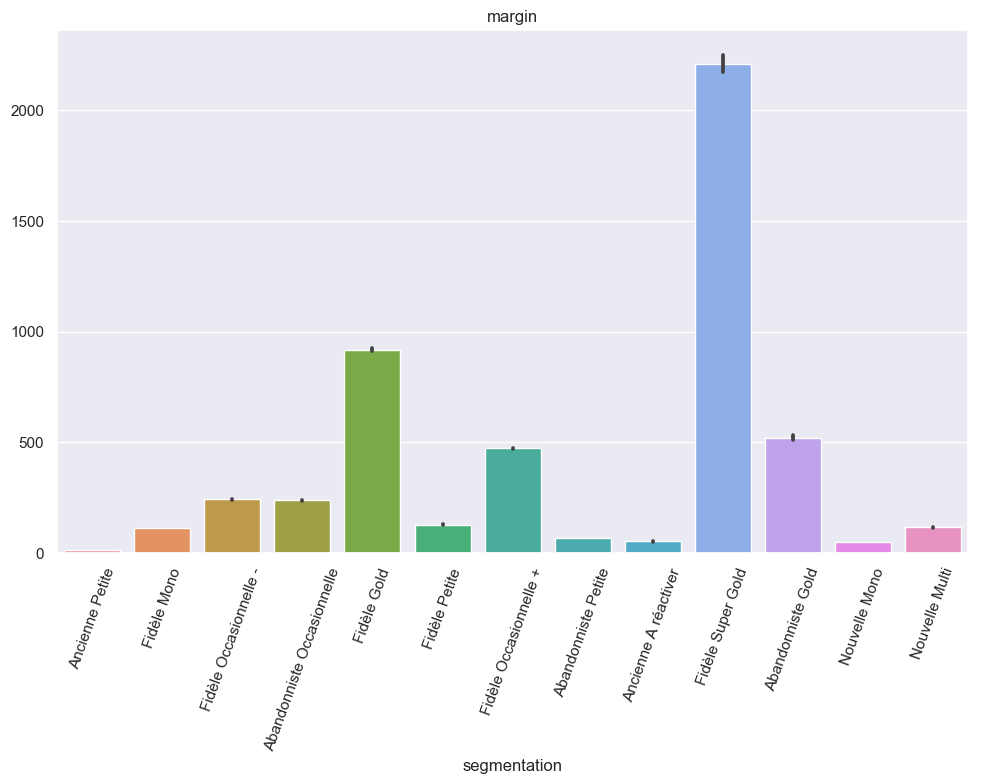

<Figure size 1000x800 with 0 Axes>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text xticklabel objects>)

Text(0.5, 1.0, 'price_net')

Text(0, 0.5, '')

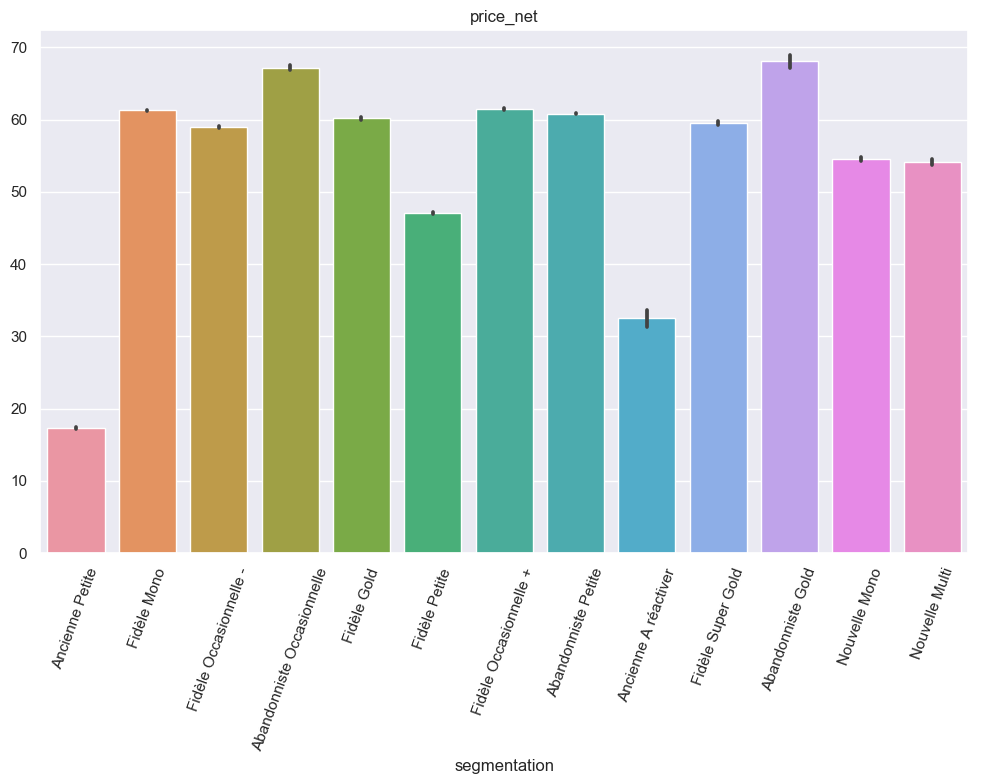

<Figure size 1000x800 with 0 Axes>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text xticklabel objects>)

Text(0.5, 1.0, 'price_theoric')

Text(0, 0.5, '')

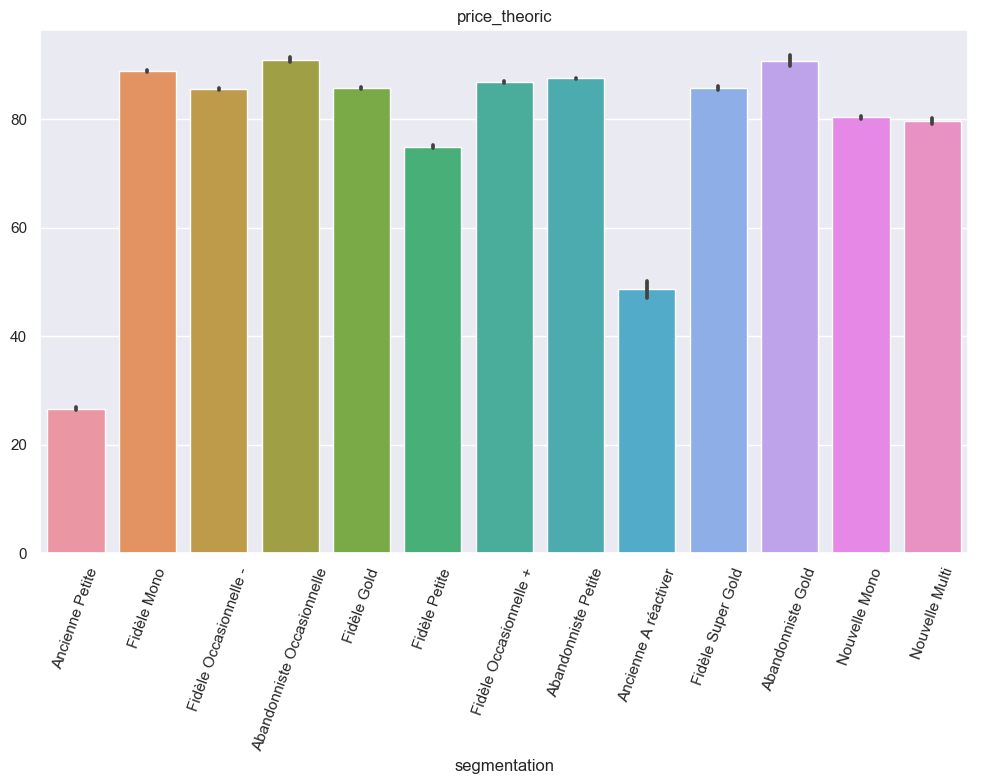

<Figure size 1000x800 with 0 Axes>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text xticklabel objects>)

Text(0.5, 1.0, 'Promo to total ratio')

Text(0, 0.5, '')

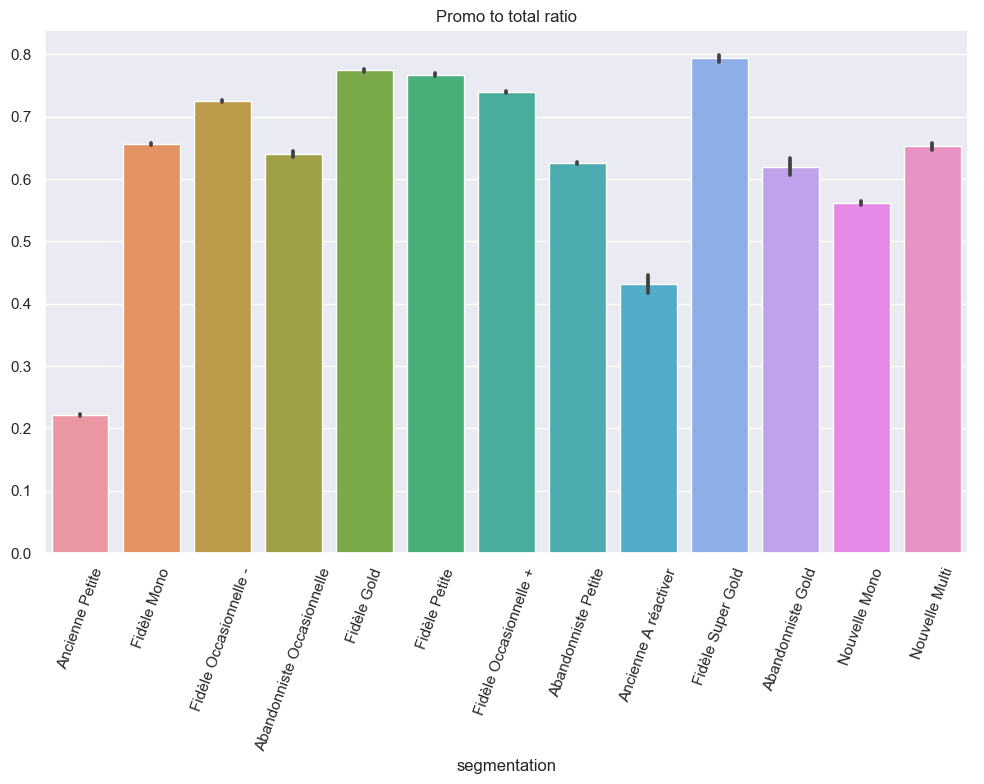

In [47]:
for i in crm_tot_df.select_dtypes('float64').columns.values:
    plt.figure(figsize = (10,8))
    sns.barplot(y = i, x = 'segmentation', data = crm_tot_df)
    plt.xticks(rotation = 70)
    plt.title(i)
    plt.ylabel("")

    plt.tight_layout()
    plt.show()

Computing number of customers per segment

<Figure size 1000x800 with 0 Axes>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text xticklabel objects>)

Text(0.5, 1.0, '# Customers per segment')

Text(0, 0.5, '')

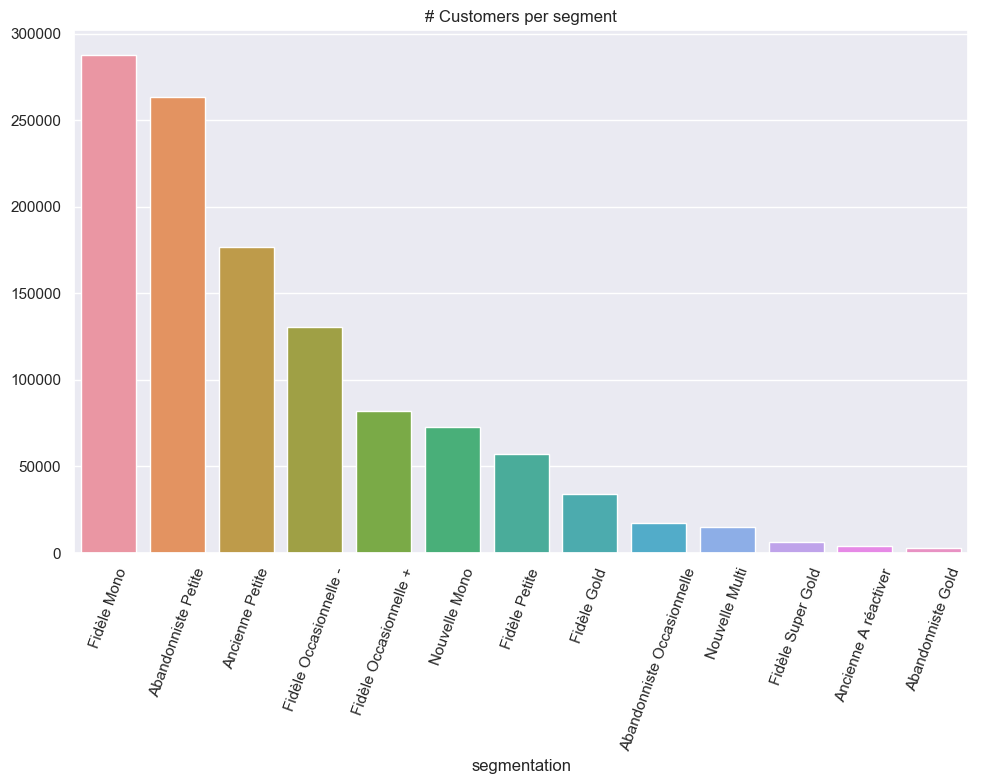

In [48]:
nb_cstm_segment=pd.DataFrame(crm_tot_df.segmentation.value_counts())

plt.figure(figsize = (10,8))
sns.countplot(data=crm_tot_df,x='segmentation',order=crm_tot_df['segmentation'].value_counts().index)
plt.xticks(rotation = 70)
plt.title('# Customers per segment')
plt.ylabel("")

plt.tight_layout()
plt.show()

In [49]:
# Value of segments
value_segments=pd.DataFrame(crm_tot_df.groupby('segmentation')['margin'].sum())
value_segments

value_of_cstm_per_segment=value_segments.margin/nb_cstm_segment.segmentation
value_of_cstm_per_segment.sort_values(ascending=False)

,margin
segmentation,
Abandonniste Gold,1.426172e+06
Abandonniste Occasionnelle,4.085197e+06
Abandonniste Petite,1.775148e+07
Ancienne A réactiver,2.251344e+05
Ancienne Petite,2.667283e+06
Fidèle Gold,3.138706e+07
Fidèle Mono,3.250306e+07
Fidèle Occasionnelle +,3.900836e+07
Fidèle Occasionnelle -,3.167019e+07


Fidèle Super Gold             2211.556083
Fidèle Gold                    919.201642
Abandonniste Gold              520.690690
Fidèle Occasionnelle +         473.977628
Fidèle Occasionnelle -         242.622061
Abandonniste Occasionnelle     237.995752
Fidèle Petite                  128.777223
Nouvelle Multi                 117.455827
Fidèle Mono                    113.086387
Abandonniste Petite             67.459943
Ancienne A réactiver            53.565163
Nouvelle Mono                   48.356090
Ancienne Petite                 15.078001
dtype: float64

Compute the ratio of unactive people in each category (the ones no in the transaction data, with unit_sold = 0)

,segmentation
Ancienne Petite,122992
Abandonniste Petite,13566
Fidèle Mono,13132
Nouvelle Mono,5720
Fidèle Occasionnelle -,2608
Fidèle Petite,2313
Ancienne A réactiver,1801
Fidèle Occasionnelle +,1022
Nouvelle Multi,734
Abandonniste Occasionnelle,440


<Figure size 1000x800 with 0 Axes>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text xticklabel objects>)

Text(0.5, 1.0, '# Unactive customers per segment')

Text(0, 0.5, '')

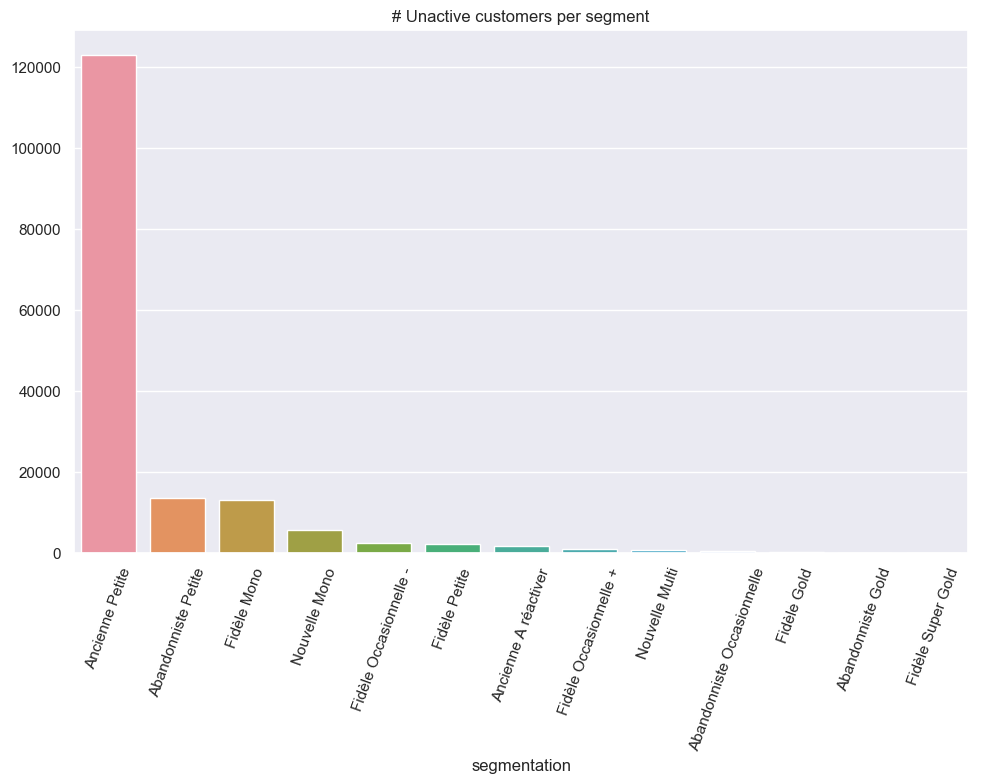

In [50]:
unactive_cstm_segment=pd.DataFrame(crm_tot_df[crm_tot_df['tot_unit_sold']==0].segmentation.value_counts())
unactive_cstm_segment
plt.figure(figsize = (10,8))
sns.countplot(data=crm_tot_df[crm_tot_df['tot_unit_sold']==0],x='segmentation',order=crm_tot_df[crm_tot_df['tot_unit_sold']==0]['segmentation'].value_counts().index)
plt.xticks(rotation = 70)
plt.title('# Unactive customers per segment')
plt.ylabel("")

plt.tight_layout()
plt.show()

Fidèle mono : many unactive customers

Dropping the unactive clients and taking another look at our data

<Figure size 1000x800 with 0 Axes>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text xticklabel objects>)

Text(0.5, 1.0, 'age')

Text(0, 0.5, '')

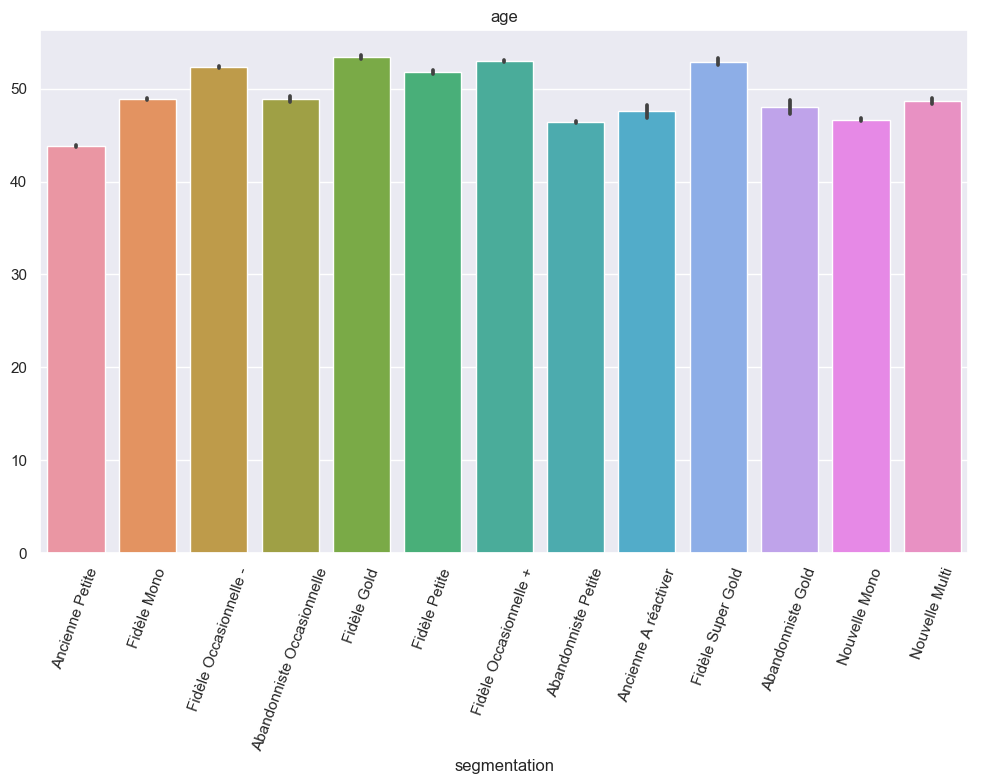

<Figure size 1000x800 with 0 Axes>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text xticklabel objects>)

Text(0.5, 1.0, 'tot_unit_sold')

Text(0, 0.5, '')

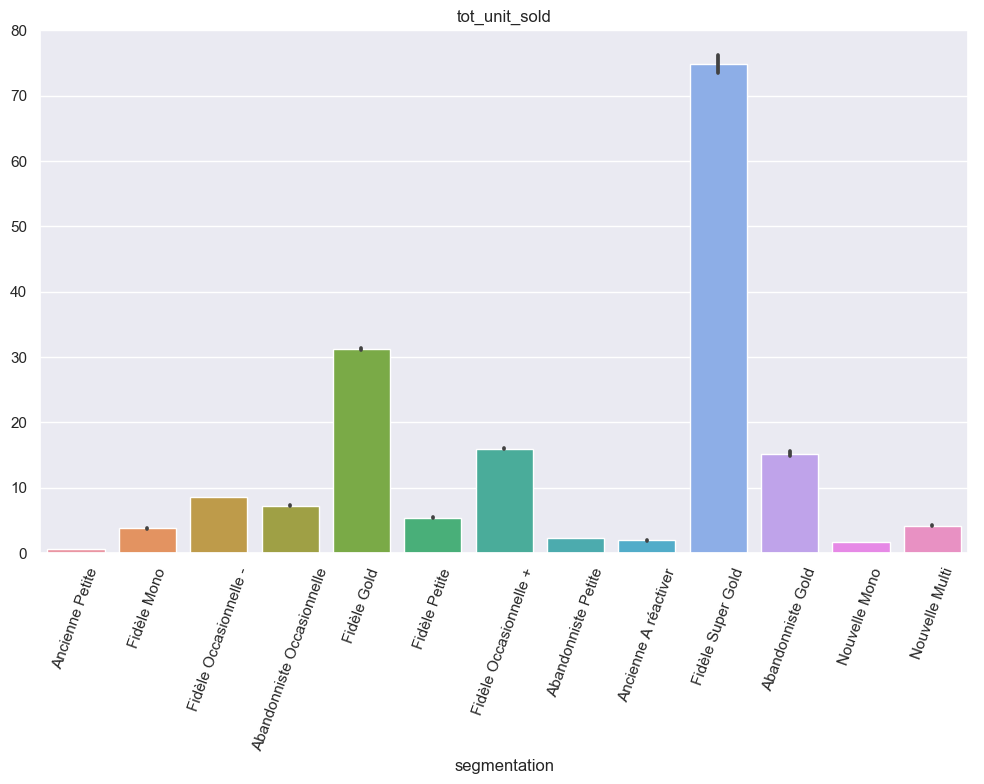

<Figure size 1000x800 with 0 Axes>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text xticklabel objects>)

Text(0.5, 1.0, 'mean_unit_sold')

Text(0, 0.5, '')

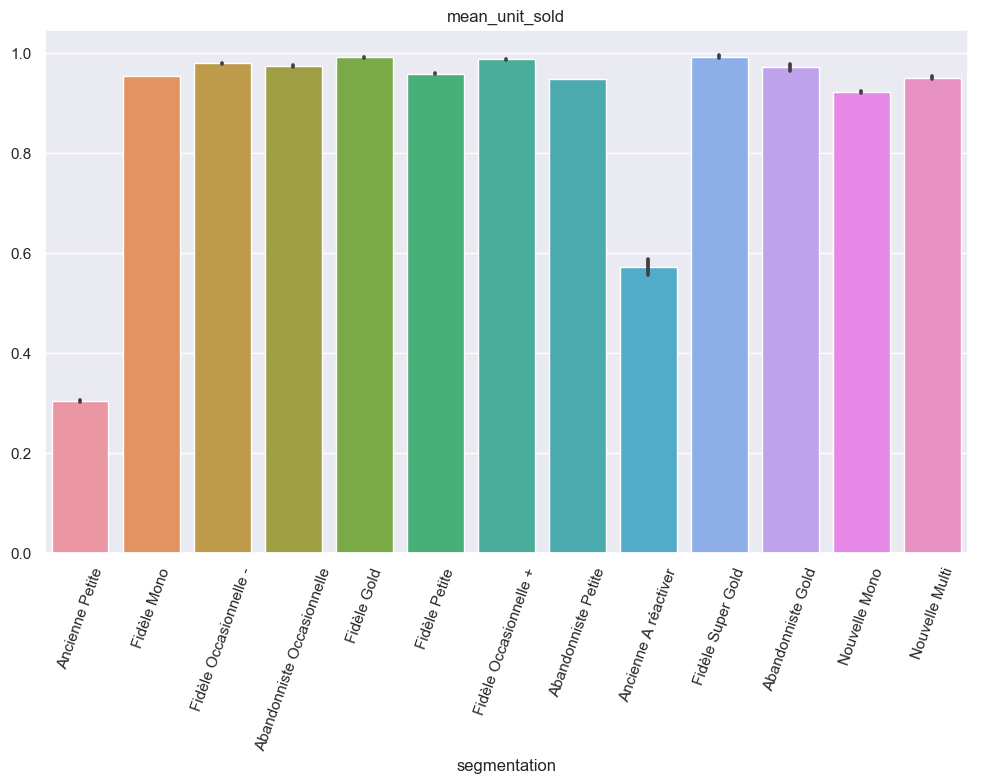

<Figure size 1000x800 with 0 Axes>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text xticklabel objects>)

Text(0.5, 1.0, 'nb of transactions')

Text(0, 0.5, '')

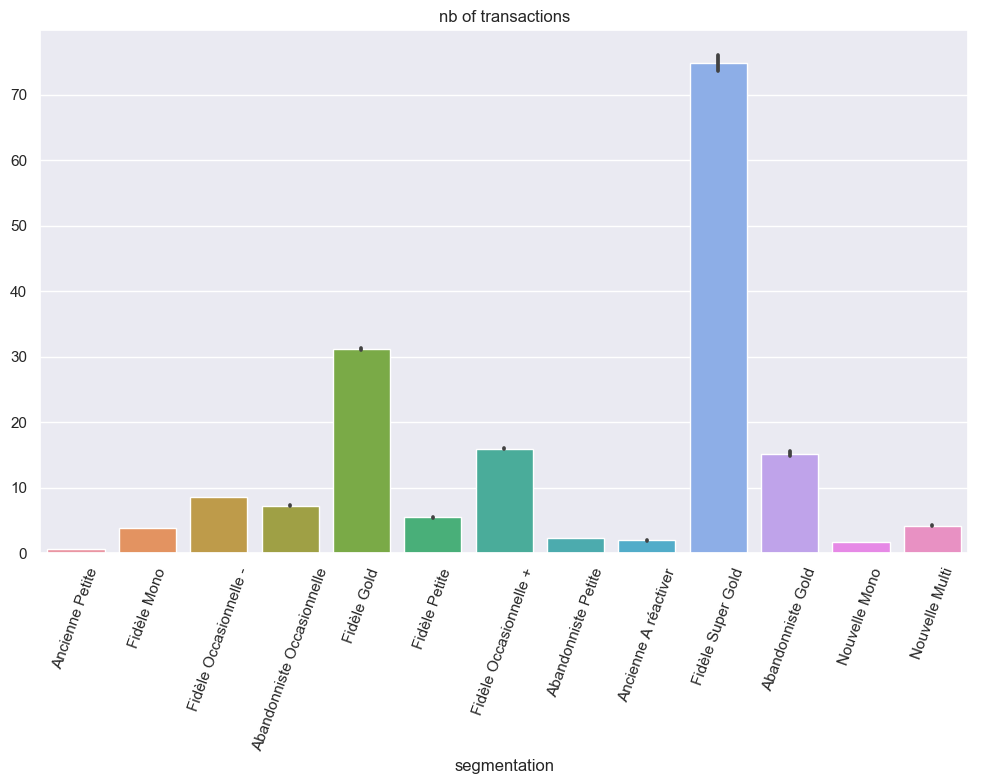

<Figure size 1000x800 with 0 Axes>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text xticklabel objects>)

Text(0.5, 1.0, 'margin')

Text(0, 0.5, '')

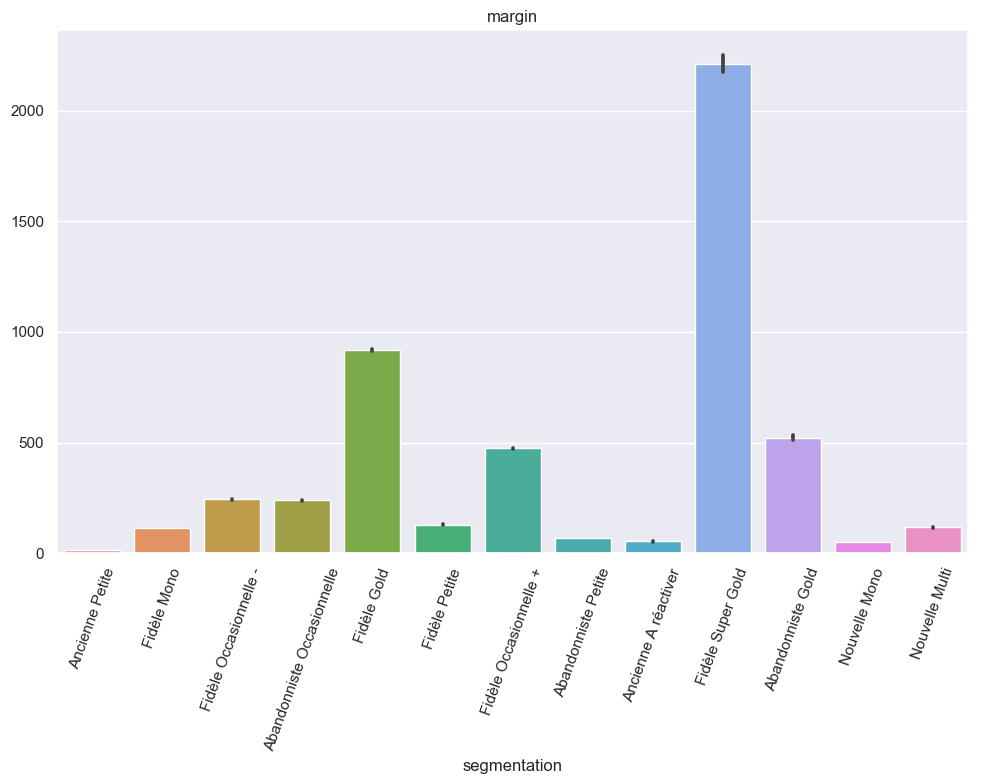

<Figure size 1000x800 with 0 Axes>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text xticklabel objects>)

Text(0.5, 1.0, 'price_net')

Text(0, 0.5, '')

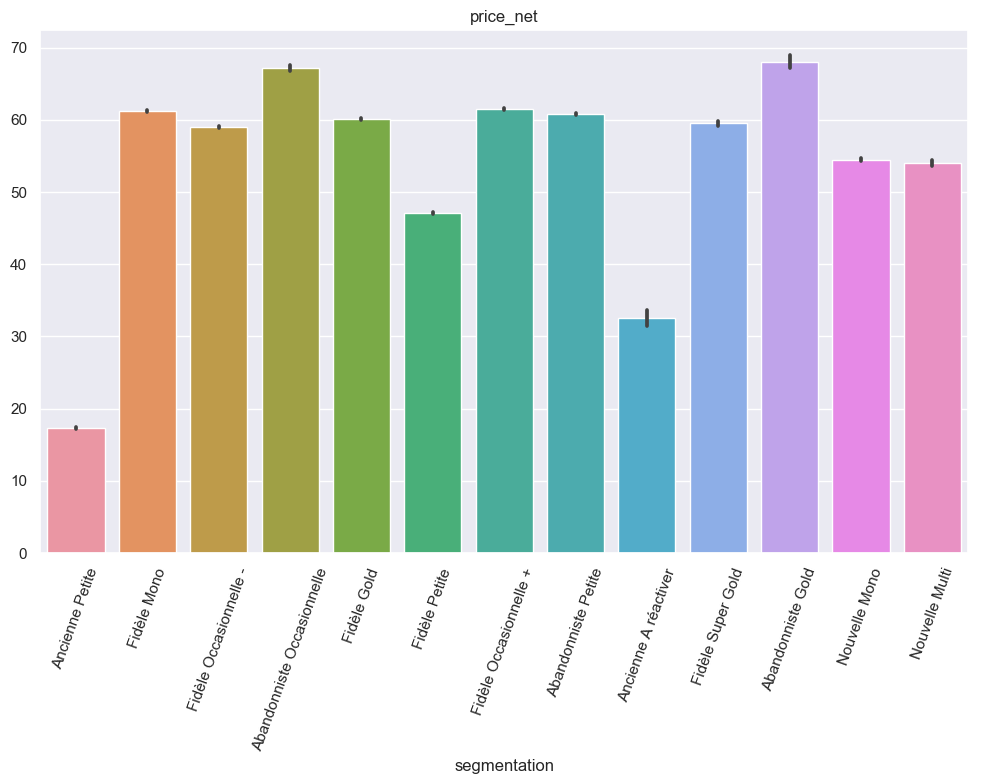

<Figure size 1000x800 with 0 Axes>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text xticklabel objects>)

Text(0.5, 1.0, 'price_theoric')

Text(0, 0.5, '')

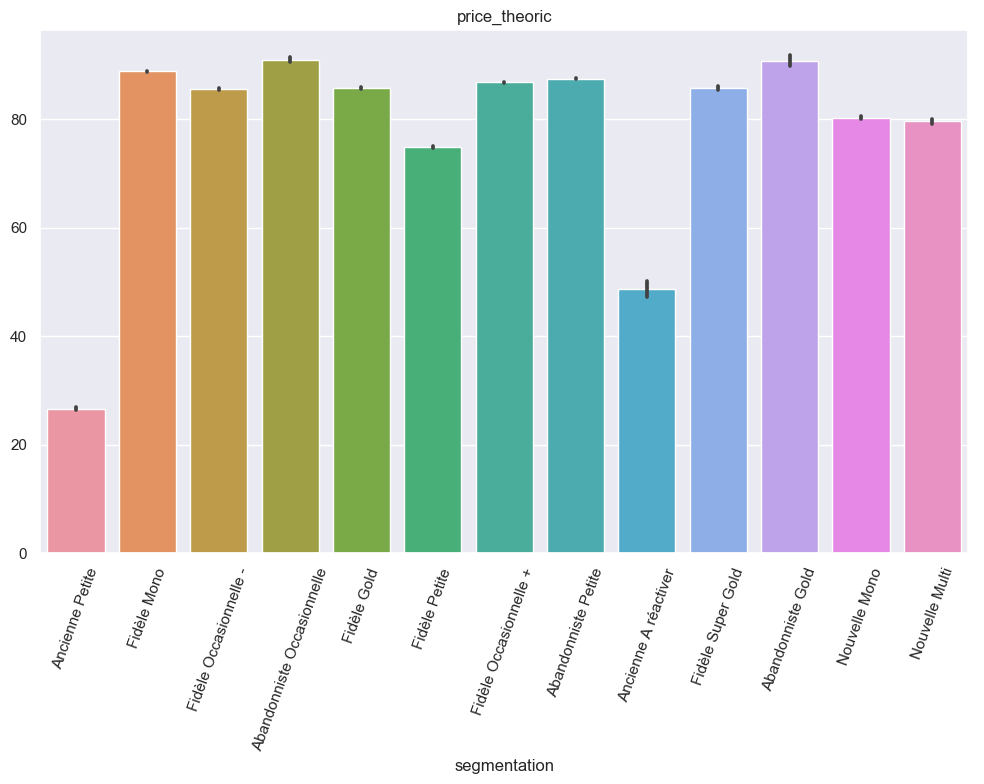

<Figure size 1000x800 with 0 Axes>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text xticklabel objects>)

Text(0.5, 1.0, 'Promo to total ratio')

Text(0, 0.5, '')

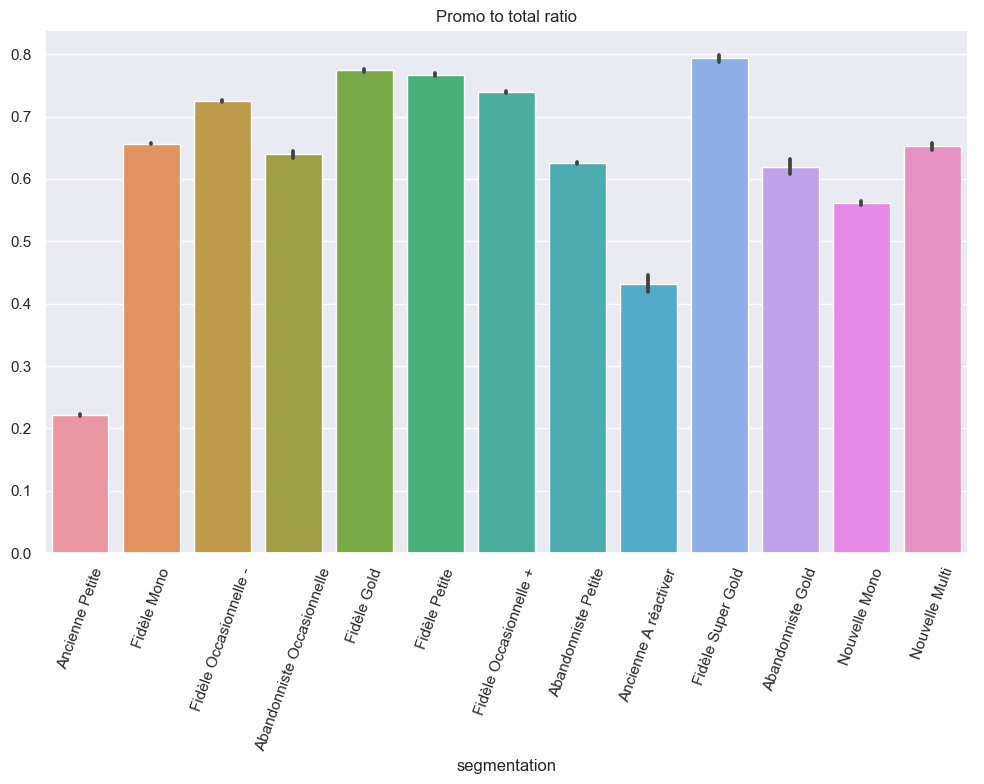

In [51]:
crm_active_clients=crm_tot_df[crm_tot_df.tot_unit_sold>0].copy()
for i in crm_active_clients.select_dtypes('float64').columns.values:
    plt.figure(figsize = (10,8))
    sns.barplot(y = i, x = 'segmentation', data = crm_tot_df)
    plt.xticks(rotation = 70)
    plt.title(i)
    plt.ylabel("")

    plt.tight_layout()
    plt.show()

# 3. Clusterization on the new dataframe

We will use k-means to create new customer segments.

## Data preparation

Creating the Data Frame that will be used for the clusterization.

In [52]:
# Data preparation

# We only want to keep the customers with pertinent information, thus we eliminate the lines with age=0.
crm_clustering=crm_active_clients[crm_active_clients.age>0].copy()
crm_clustering.set_index('client_id_2', inplace = True)

crm_clustering.info()

<class 'pandas.core.frame.DataFrame'>
Index: 851000 entries, IMP-59940476 to 408:0000009434
Data columns (total 9 columns):
segmentation            851000 non-null object
age                     851000 non-null float64
tot_unit_sold           851000 non-null float64
mean_unit_sold          851000 non-null float64
nb of transactions      851000 non-null float64
margin                  851000 non-null float64
price_net               851000 non-null float64
price_theoric           851000 non-null float64
Promo to total ratio    851000 non-null float64
dtypes: float64(8), object(1)
memory usage: 64.9+ MB


In [53]:
# Data scaling preparation

crm_scaled = crm_clustering.copy()

#Creating a sample for visualization purposes
crm_sample=crm_scaled.sample(n=150).copy()

# Extracting the segments
crm_scaled_segments = crm_scaled.filter(['segmentation'],axis=1)
crm_sample_segments = crm_sample.filter(['segmentation'],axis=1)

# We will drop the segments to cluster and the age variable as we want to represent purchase behaviours
crm_scaled.drop(['segmentation','age'],axis=1,inplace=True)
crm_sample.drop(['segmentation','age'],axis=1,inplace=True)

In [54]:
# Data scaling with MinMaxScaler for the DataFrame and the sample

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

crm_scaled[crm_scaled.columns] = scaler.fit_transform(crm_scaled[crm_scaled.columns])
crm_sample[crm_sample.columns] = scaler.fit_transform(crm_sample[crm_sample.columns])

## Clustering of customers

We want to find the ideal number of clusters to use in k-means. We will use the elbow curve.

In [ ]:
#Computing different values of squared distances
from sklearn.cluster import KMeans

Sum_of_squared_distances_crm = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(crm_scaled)
    Sum_of_squared_distances_crm.append(km.inertia_)
    print(k)

In [ ]:
# Plotting the elbow curve
plt.plot(K, Sum_of_squared_distances_crm, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

The best compromise seems to be 5 clusters.

In [ ]:
# Fitting the model with our choice of k :
from sklearn.cluster import KMeans

kmeans5crm = KMeans(n_clusters=5)
kmeans5crm.fit(crm_scaled)

In [ ]:
# Predicting the values for the sample and the whole dataframe

# Sample
clusters5_sample=kmeans5crm.predict(crm_sample)

# Whole DataFrame
clusters5_tot=kmeans5crm.predict(crm_scaled)

## Vizualisation of the segmentation

In [ ]:
# Adding the original segments :

crm_scaled = pd.concat([crm_scaled, crm_scaled_segments], axis=1, sort = False)
crm_sample = pd.concat([crm_sample, crm_sample_segments], axis=1, sort = False)

# Adding the clusters-prediction :
crm_sample = pd.concat([crm_sample, pd.DataFrame(clusters5_sample, index = crm_sample.index,columns=['new_segment'])], axis=1, sort = False)
crm_scaled=pd.concat([crm_scaled, pd.DataFrame(clusters5_tot, index = crm_scaled.index,columns=['new_segment'])], axis=1, sort = False)

In [ ]:
# Transforming the previous segments in numbers to make the vizualisation easier
crm_sample.segmentation = crm_sample.segmentation.map(dict(zip(crm_sample.segmentation.unique(),list(range(1, 12)))))

In [ ]:
# Plotting the new clusters of the sample for all the combinations of features
from itertools import combinations

for a,b in list(combinations(crm_sample.columns,2)):
    plt.scatter(crm_sample[a],crm_sample[b], c=clusters5_sample)
    plt.xlabel(a)
    plt.ylabel(b)
    plt.show()

In [ ]:
#Plotting the old segmentation

for a,b in list(combinations(crm_sample.columns,2)):
    plt.scatter(crm_sample[a],crm_sample[b], c=crm_sample.segmentation)
    plt.xlabel(a)
    plt.ylabel(b)
    plt.show()

## Comparison of the old segmentation and the new one

Computing the ratio of old segments in the new segments

In [ ]:
#Computing the total number of customers by previous segment for each new segment
crm_by_segment = pd.DataFrame(crm_scaled.groupby(['new_segment'])['segmentation'].value_counts())
crm_by_segment=pd.concat([crm_by_segment,crm_by_segment.index.to_frame(index = True)],axis=1)

# Computing the total number of customers by previous segment
total_segments=pd.DataFrame(crm_by_segment['segmentation'].groupby('new_segment').sum())

In [ ]:
# Creating the DataFrame segments_ration with the percentage of each previous segment in each new segment
segments_ratio=crm_by_segment.set_index(pd.DataFrame(crm_by_segment.index.to_frame(index=False)).index)
segments_ratio.columns=['nb','new_segment','segmentation']
segments_ratio['total']=segments_ratio['new_segment'].map(total_segments['segmentation'])
segments_ratio['ratio']=segments_ratio['nb']/segments_ratio.total

segments_ratio.set_index('new_segment', inplace = True)
segments_ratio.head()

In [ ]:
# Plotting the barplots for each feature by new segment
for i in crm_scaled.select_dtypes('float64').columns.values:
    plt.figure(figsize = (10,8))
    sns.barplot(y = i, x = 'new_segment', data = crm_scaled)
    plt.xticks(rotation = 70)
    plt.title(i)
    plt.ylabel("")

    plt.tight_layout()
    plt.show()

### Plotting the clusters on the original dataframe

In [ ]:
#Adding the new_segmentation to the unscaled dataframe
crm_tot_df.insert(2, 'new_segment', crm_tot_df['client_id_2'].map(crm_scaled['new_segment']))

# Dropping the columns with age = 0 (customers with no information)
crm_tot_with_seg=crm_tot_df[crm_tot_df.age>0].dropna(axis=0).copy()
crm_tot_with_seg.head()

In [ ]:
# Plotting the margin's boxplots

    # for the new segmentation
sns.boxplot(y=crm_tot_with_seg.margin,x=crm_tot_with_seg.new_segment)
plt.show()

    # for the previous segmentation
sns.boxplot(y=crm_tot_with_seg.margin,x=crm_tot_with_seg.segmentation)
plt.xticks(rotation = 90)
plt.show()

# Plotting the margin by new segment :

plt.figure(figsize = (7,5))
sns.barplot(y = 'margin', x = 'new_segment', data = crm_tot_with_seg)
plt.xticks(rotation = 70)
plt.title('Margin by new segment')
plt.ylabel("")
plt.show()

The values are very concentrated but it allows us to observe how the high values (outliers) are segmented. We observe that it is not well represented by our new segmentation. We will adjust this by creating a new category dedicated to the high margin customers.

## Creating the high margin segment 

In [ ]:
# We create a new DataFrame with the category high margin(5)
crm_with_hmargin=crm_tot_with_seg.copy()

crm_with_hmargin.loc[(crm_with_hmargin['margin']>crm_with_hmargin.margin.quantile(0.75)) & (crm_with_hmargin.new_segment==4),'new_segment']=5

crm_with_hmargin.head()

In [ ]:
# Computing the margin per unit sold
crm_with_hmargin['margin_per_unit']=crm_with_hmargin.margin/crm_with_hmargin.tot_unit_sold
crm_with_hmargin.head()

In [ ]:
# We plot the barplots for previous segments for the most important features to compare it with the new ones:

fig2=plt.figure(figsize=(10,8))
sns.barplot(y = 'Promo to total ratio', x='segmentation', data = crm_with_hmargin)
plt.xticks(labels=None,rotation=90)
plt.title('Promotion to total ratio for previous segments')
plt.show()
fig2.savefig('fig2.png',bbox_inches='tight')


fig3=plt.figure(figsize = (10,8))
sns.barplot(y = 'margin', x = 'segmentation', data = crm_with_hmargin)
plt.title('Margin for previous segments')
plt.xticks(labels=None,rotation=90)
plt.show()
fig3.savefig('fig3.png',bbox_inches='tight')


In [ ]:
# Plotting barplots for the main features for the new segments

fig6=plt.figure(figsize = (10,8))
sns.barplot(y = 'Promo to total ratio', x = 'new_segment', data = crm_with_hmargin)
plt.title('Promotion to total ratio for our new segments')
plt.xticks(rotation = 70)
plt.show()
fig6.savefig('fig6.png',bbox_inches='tight')

fig7=plt.figure(figsize = (10,8))
sns.barplot(y = 'margin', x = 'new_segment', data = crm_with_hmargin)
plt.title('Total margin per customer for our new segments')
plt.xticks(rotation = 70)
plt.show()
fig7.savefig('fig7.png',bbox_inches='tight')


fig8=plt.figure(figsize = (10,8))
sns.barplot(y = 'margin_per_unit', x = 'new_segment', data = crm_with_hmargin)
plt.title('Margin per unit per customer for our new segments')
plt.xticks(rotation = 70)
plt.show()
fig8.savefig('fig8.png',bbox_inches='tight')


nb_cstm_segment2=pd.DataFrame(crm_with_hmargin.new_segment.value_counts())

fig9=plt.figure(figsize = (10,8))
sns.countplot(data=crm_with_hmargin,x='new_segment')
plt.xticks(rotation = 70)
plt.title('# Customers per segment')
plt.ylabel("")
fig9.savefig('fig9.png',bbox_inches='tight')


plt.tight_layout()
plt.show()


In [ ]:
# Focus on the high margin segment :
crm_with_hmargin[crm_with_hmargin.new_segment==5.0].describe()